In [3]:
# Overview data

import pandas as pd

# Load your feature counts dataframes
batch1 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch3_chm13_collapsed_summary_metrics.csv')
batch4 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Combine the dataframes
df = pd.concat([batch1, batch2, batch3, batch4], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Remove duplicate haplotypes
unique_haplotypes_df = df.drop_duplicates(subset=['Sample_Haplotype'])

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the unique haplotypes DataFrame on 'Sample' column
merged_df = pd.merge(unique_haplotypes_df, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Count the total number of unique haplotypes
total_haplotypes = len(merged_df['Sample_Haplotype'].unique())
print(f"Total number of unique haplotypes: {total_haplotypes}")

# Check and count the sex and superpopulation annotations
sex_counts = merged_df['Sex'].value_counts()
print("Sex counts:\n", sex_counts)

superpop_counts = merged_df['Superpopulation name'].value_counts()
print("Superpopulation counts:\n", superpop_counts)

# Identify samples with missing annotations
missing_sex = merged_df[merged_df['Sex'].isna()]['Sample']
missing_superpop = merged_df[merged_df['Superpopulation name'].isna()]['Sample']

print("Samples with missing Sex annotation:")
print(missing_sex)

print("\nSamples with missing Superpopulation annotation:")
print(missing_superpop)

# Group by 'Superpopulation name' and 'Sex', then count occurrences
haplotype_by_superpop = merged_df.groupby(['Superpopulation name', 'Sex']).size().unstack(fill_value=0)

# Display the resulting DataFrame
print("\nHaplotype by Superpopulation:\n", haplotype_by_superpop)


Total number of unique haplotypes: 130
Sex counts:
 Sex
female    68
male      58
Name: count, dtype: int64
Superpopulation counts:
 Superpopulation name
African Ancestry        58
East Asian Ancestry     20
American Ancestry       18
South Asian Ancestry    16
European Ancestry       14
Name: count, dtype: int64
Samples with missing Sex annotation:
11    NA21487
28    NA21487
81    NA24385
87    NA24385
Name: Sample, dtype: object

Samples with missing Superpopulation annotation:
11    NA21487
28    NA21487
81    NA24385
87    NA24385
Name: Sample, dtype: object

Haplotype by Superpopulation:
 Sex                   female  male
Superpopulation name              
African Ancestry          28    30
American Ancestry         12     6
East Asian Ancestry       12     8
European Ancestry          6     8
South Asian Ancestry      10     6


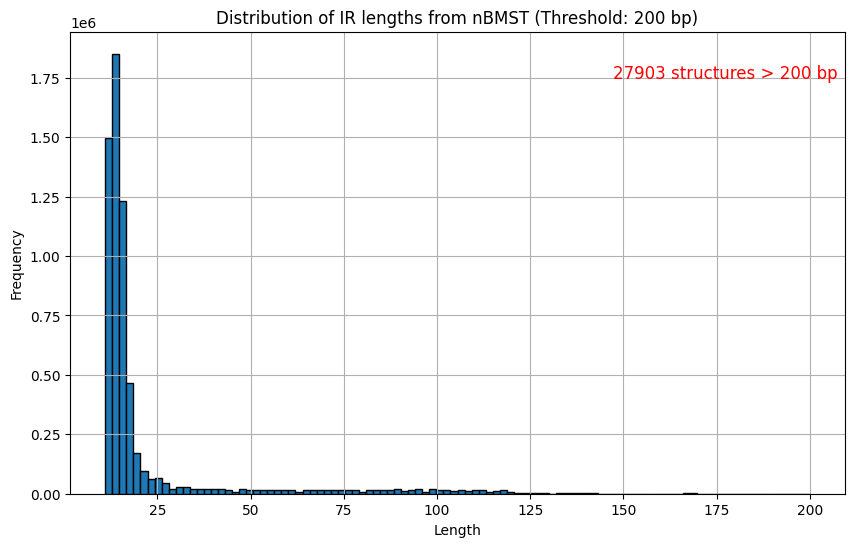

In [4]:
# Plot distribution of Inverted Repeat Lengths

import pandas as pd
import matplotlib.pyplot as plt

# Read the BED file into a pandas DataFrame
bed_file = '/home/alextu/scratch/results/bed_files/chm13_ref_genome/chm13v2.0_nonb_annotations_collapsed/IR/IR.collapsed.bed'
df = pd.read_csv(bed_file, sep='\t', header=None, names=['chrom', 'start', 'end'])

# Calculate the length of each entry
df['length'] = df['end'] - df['start']

# Define a length threshold
length_threshold = 200  # Example threshold, change as needed

# Filter out lengths longer than the threshold
filtered_df = df[df['length'] <= length_threshold]

# Count the number of structures past the threshold
structures_past_threshold = df[df['length'] > length_threshold].shape[0]

# Plot the distribution of lengths
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['length'], bins=100, edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title(f'Distribution of IR lengths from nBMST (Threshold: {length_threshold} bp)')
plt.grid(True)

# Annotate the number of structures past the threshold
plt.annotate(f'{structures_past_threshold} structures > {length_threshold} bp', 
             xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Show the plot
plt.show()


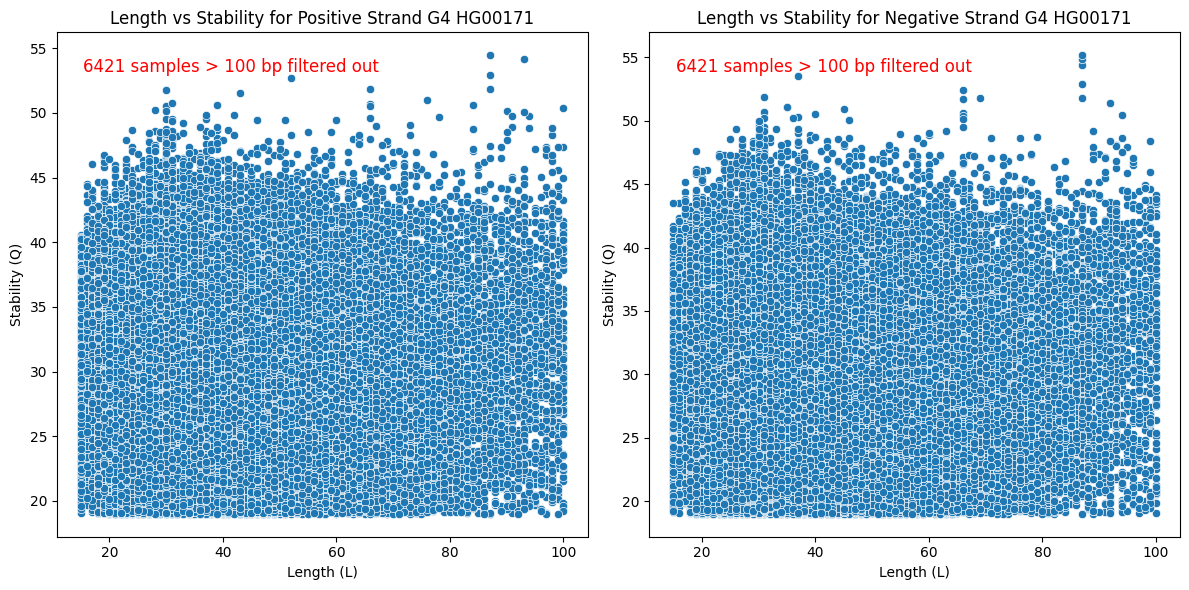

In [6]:
#Plot Stability vs length for G4s

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a pandas DataFrame
csv_file = '/home/alextu/scratch/results/quadron_q19_filtered_csvs/20230818_verkko_batch1_assemblies_aligned_chm13_collapsed/HG00171_hap1_quadron_filtered_verkko_batch1.csv'
df = pd.read_csv(csv_file)

# Define length threshold
length_threshold = 100  # Adjust the threshold as needed

# Filter out motifs over the specified length
df_filtered = df[df['L'] <= length_threshold]

# Count the number of filtered samples
num_filtered_samples = df[df['L'] > length_threshold].shape[0]

# Filter the data based on STR values
df_positive = df_filtered[df_filtered['STR'] == '+']
df_negative = df_filtered[df_filtered['STR'] == '-']

# Plotting Length (L) versus Stability (Q) for positive STR values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_positive, x='L', y='Q')
plt.xlabel('Length (L)')
plt.ylabel('Stability (Q)')
plt.title('Length vs Stability for Positive Strand G4 HG00171')
plt.annotate(f'{num_filtered_samples} samples > {length_threshold} bp filtered out', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red', 
             verticalalignment='top')

# Plotting Length (L) versus Stability (Q) for negative STR values
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_negative, x='L', y='Q')
plt.xlabel('Length (L)')
plt.ylabel('Stability (Q)')
plt.title('Length vs Stability for Negative Strand G4 HG00171')
plt.annotate(f'{num_filtered_samples} samples > {length_threshold} bp filtered out', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red', 
             verticalalignment='top')

plt.tight_layout()
plt.show()


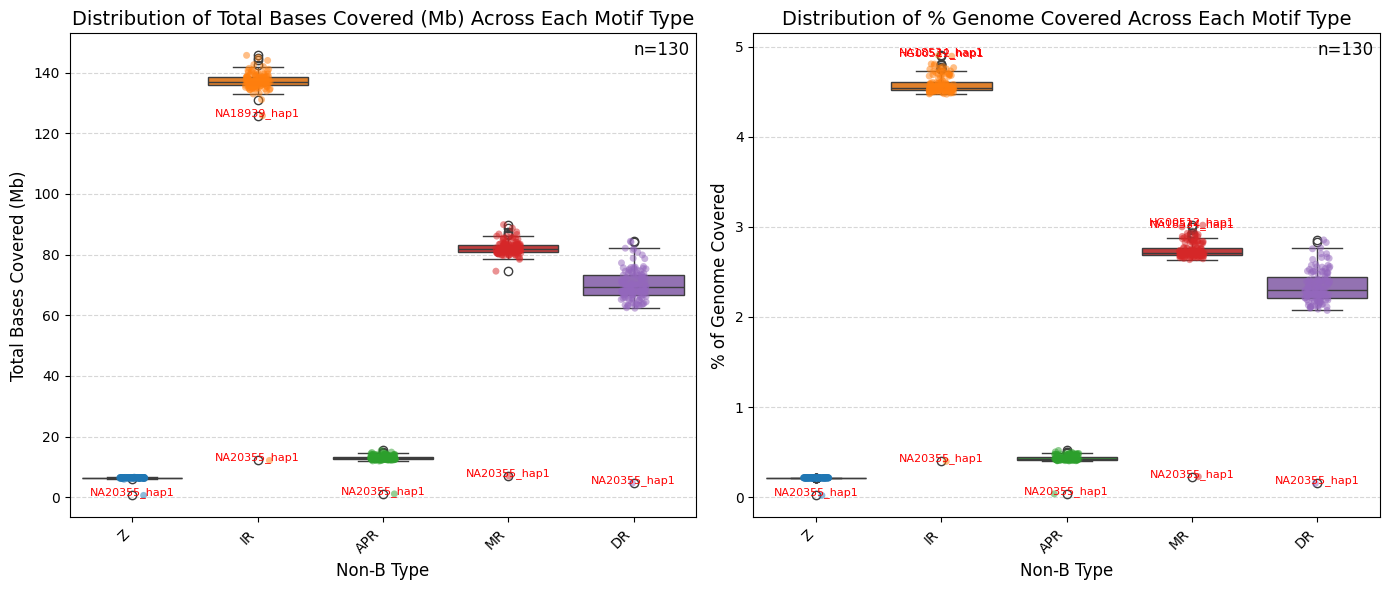

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your feature counts dataframes
batch1 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch3_chm13_collapsed_summary_metrics.csv')

# Combine the dataframes
df = pd.concat([batch1, batch2, batch3], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Convert Total Bases Covered to megabases (Mb)
df['Total Bases Covered (Mb)'] = df['Total Bases Covered'] / 1_000_000

# Sort by 'Sample_Haplotype'
sorted_df = df.sort_values(by='Sample_Haplotype')

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the sorted DataFrame on 'Sample' column
merged_df = pd.merge(sorted_df, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Function to identify extreme outliers
def identify_extreme_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Get unique number of sample_haplotypes
unique_sample_haplotypes = merged_df['Sample_Haplotype'].nunique()

# Plotting using seaborn
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed

# First subplot with distribution of total bases covered (Mb)
plt.subplot(1, 2, 1)
# Create a boxplot using seaborn
sns.boxplot(data=merged_df, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_df, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate extreme outliers
for motif_type in merged_df['Motif Type'].unique():
    motif_data = merged_df[merged_df['Motif Type'] == motif_type]
    outliers = identify_extreme_outliers(motif_data['Total Bases Covered (Mb)'])
    for i in outliers.index:
        sample_haplotype = f"{merged_df.loc[i, 'Sample']}_{merged_df.loc[i, 'Haplotype']}"
        plt.text(x=motif_type, y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_df['Motif Type'].nunique() - 0.55, y=merged_df['Total Bases Covered (Mb)'].max() * 1.0, s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
plt.title('Distribution of Total Bases Covered (Mb) Across Each Motif Type', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Second subplot with distribution of percent genome covered
plt.subplot(1, 2, 2)
# Create a boxplot using seaborn
sns.boxplot(data=merged_df, x='Motif Type', y='Percent of Genome', hue='Motif Type', palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_df, x='Motif Type', y='Percent of Genome', hue='Motif Type', palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate extreme outliers
for motif_type in merged_df['Motif Type'].unique():
    motif_data = merged_df[merged_df['Motif Type'] == motif_type]
    outliers = identify_extreme_outliers(motif_data['Percent of Genome'])
    for i in outliers.index:
        sample_haplotype = f"{merged_df.loc[i, 'Sample']}_{merged_df.loc[i, 'Haplotype']}"
        plt.text(x=motif_type, y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_df['Motif Type'].nunique() - 0.55, y=merged_df['Percent of Genome'].max() * 1.0, s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('% of Genome Covered', fontsize=12)
plt.title('Distribution of % Genome Covered Across Each Motif Type', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


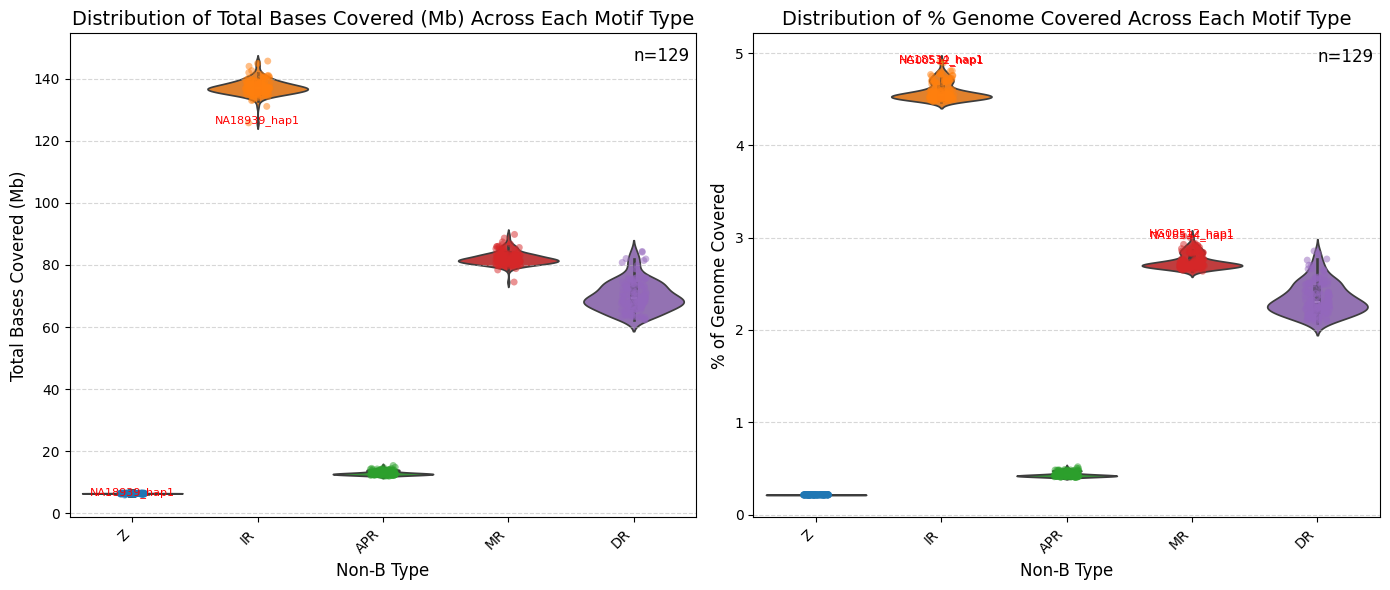

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your feature counts dataframes
batch1 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch3_chm13_collapsed_summary_metrics.csv')

# Combine the dataframes
df = pd.concat([batch1, batch2, batch3], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Remove the specified sample_haplotype
df = df[df['Sample_Haplotype'] != 'NA20355_hap1']

# Convert Total Bases Covered to megabases (Mb)
df['Total Bases Covered (Mb)'] = df['Total Bases Covered'] / 1_000_000

# Sort by 'Sample_Haplotype'
sorted_df = df.sort_values(by='Sample_Haplotype')

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the sorted DataFrame on 'Sample' column
merged_df = pd.merge(sorted_df, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Function to identify extreme outliers
def identify_extreme_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Get unique number of sample_haplotypes
unique_sample_haplotypes = merged_df['Sample_Haplotype'].nunique()

# Plotting using seaborn
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed

# First subplot with distribution of total bases covered (Mb)
plt.subplot(1, 2, 1)
# Create a violin plot using seaborn
sns.violinplot(data=merged_df, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_df, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate extreme outliers
for motif_type in merged_df['Motif Type'].unique():
    motif_data = merged_df[merged_df['Motif Type'] == motif_type]
    outliers = identify_extreme_outliers(motif_data['Total Bases Covered (Mb)'])
    for i in outliers.index:
        sample_haplotype = f"{merged_df.loc[i, 'Sample']}_{merged_df.loc[i, 'Haplotype']}"
        plt.text(x=motif_type, y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_df['Motif Type'].nunique() - 0.55, y=merged_df['Total Bases Covered (Mb)'].max() * 1.0, s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
plt.title('Distribution of Total Bases Covered (Mb) Across Each Motif Type', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Second subplot with distribution of percent genome covered
plt.subplot(1, 2, 2)
# Create a violin plot using seaborn
sns.violinplot(data=merged_df, x='Motif Type', y='Percent of Genome', hue='Motif Type', palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_df, x='Motif Type', y='Percent of Genome', hue='Motif Type', palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate extreme outliers
for motif_type in merged_df['Motif Type'].unique():
    motif_data = merged_df[merged_df['Motif Type'] == motif_type]
    outliers = identify_extreme_outliers(motif_data['Percent of Genome'])
    for i in outliers.index:
        sample_haplotype = f"{merged_df.loc[i, 'Sample']}_{merged_df.loc[i, 'Haplotype']}"
        plt.text(x=motif_type, y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_df['Motif Type'].nunique() - 0.55, y=merged_df['Percent of Genome'].max() * 1.0, s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('% of Genome Covered', fontsize=12)
plt.title('Distribution of % Genome Covered Across Each Motif Type', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


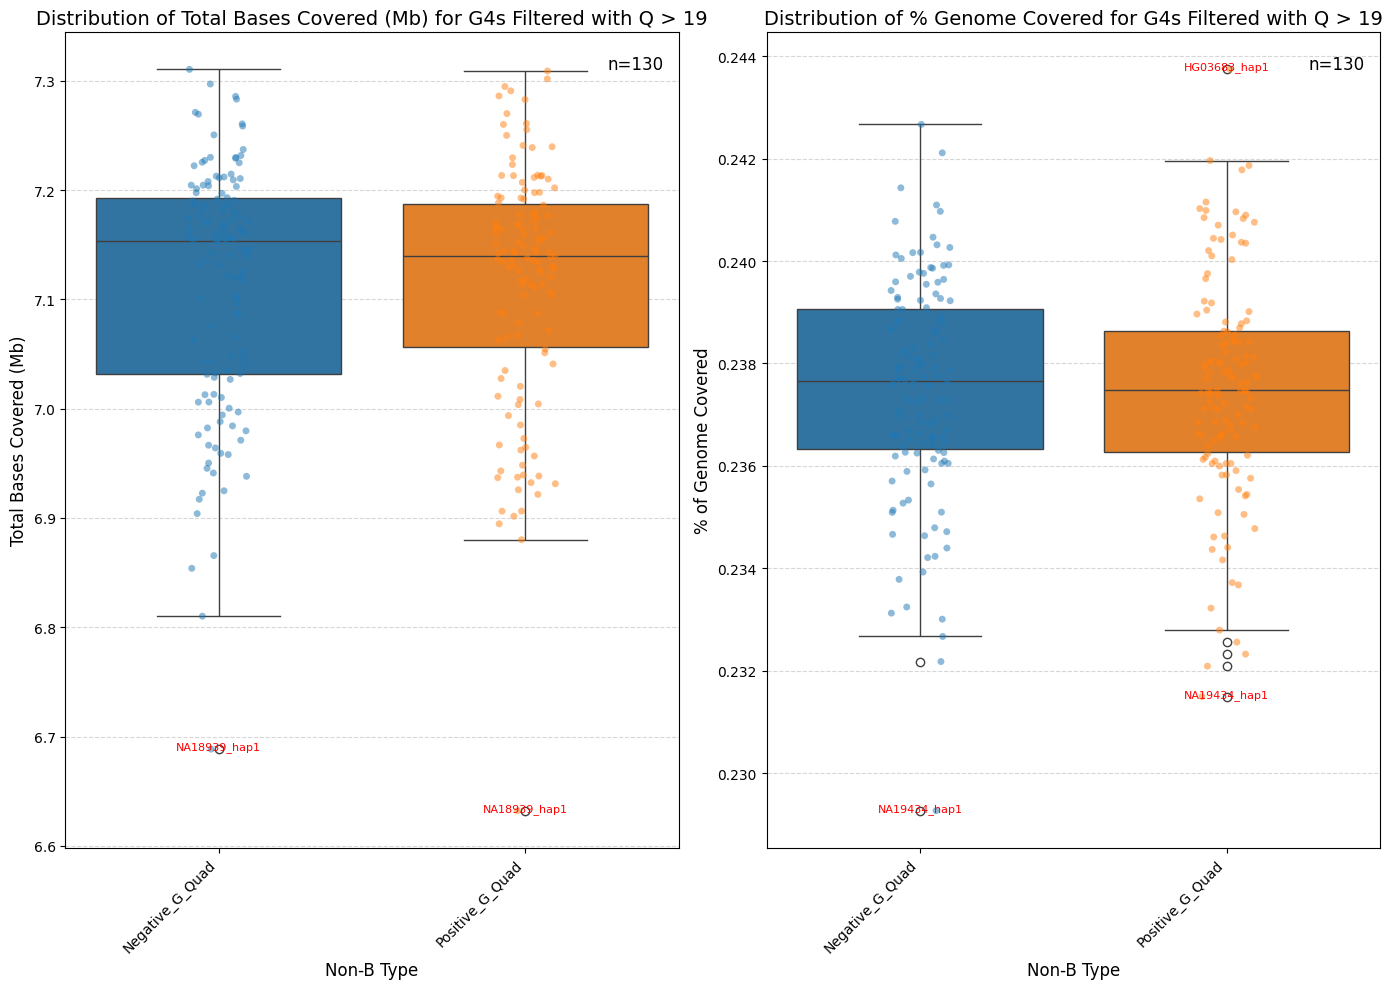

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load your feature counts dataframe for batch4
batch4 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
batch4[['Sample', 'Haplotype']] = batch4['Sample_Haplotype'].str.split('_', expand=True)

# Convert Total Bases Covered to megabases (Mb)
batch4['Total Bases Covered (Mb)'] = batch4['Total Bases Covered'] / 1_000_000

# Sort by 'Sample_Haplotype'
sorted_batch4 = batch4.sort_values(by='Sample_Haplotype')

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the sorted DataFrame on 'Sample' column
merged_batch4 = pd.merge(sorted_batch4, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Function to identify outliers
def identify_outliers(data, multiplier=2):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Get unique number of sample_haplotypes
unique_sample_haplotypes = merged_batch4['Sample_Haplotype'].nunique()

# Plotting using seaborn
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

# First subplot with distribution of total bases covered (Mb)
plt.subplot(1, 2, 1)
# Create a boxplot using seaborn
sns.boxplot(data=merged_batch4, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_batch4, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate outliers
for motif_type in merged_batch4['Motif Type'].unique():
    motif_data = merged_batch4[merged_batch4['Motif Type'] == motif_type]
    outliers = identify_outliers(motif_data['Total Bases Covered (Mb)'])
    for i in outliers.index:
        sample_haplotype = f"{merged_batch4.loc[i, 'Sample']}_{merged_batch4.loc[i, 'Haplotype']}"
        plt.text(x=list(merged_batch4['Motif Type'].unique()).index(motif_type), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_batch4['Motif Type'].nunique() - 0.55, y=merged_batch4['Total Bases Covered (Mb)'].max() * 1.0, s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# T-Test between pos and neg G-quadruplexes
pos_g4 = merged_batch4[merged_batch4['Motif Type'] == 'G4_Pos']['Total Bases Covered (Mb)']
neg_g4 = merged_batch4[merged_batch4['Motif Type'] == 'G4_Neg']['Total Bases Covered (Mb)']
t_stat, p_value = stats.ttest_ind(pos_g4, neg_g4)

# Annotate significance
if p_value < 0.05:
    plt.text(0.5, merged_batch4['Total Bases Covered (Mb)'].max() * 1.15, s=f"p={p_value:.3e}", fontsize=12, ha='center')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
plt.title('Distribution of Total Bases Covered (Mb) for G4s Filtered with Q > 19', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Second subplot with distribution of percent genome covered
plt.subplot(1, 2, 2)
# Create a boxplot using seaborn
sns.boxplot(data=merged_batch4, x='Motif Type', y='Percent of Genome', hue='Motif Type', palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_batch4, x='Motif Type', y='Percent of Genome', hue='Motif Type', palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate outliers
for motif_type in merged_batch4['Motif Type'].unique():
    motif_data = merged_batch4[merged_batch4['Motif Type'] == motif_type]
    outliers = identify_outliers(motif_data['Percent of Genome'])
    for i in outliers.index:
        sample_haplotype = f"{merged_batch4.loc[i, 'Sample']}_{merged_batch4.loc[i, 'Haplotype']}"
        plt.text(x=list(merged_batch4['Motif Type'].unique()).index(motif_type), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_batch4['Motif Type'].nunique() - 0.55, y=merged_batch4['Percent of Genome'].max() * 1.0, s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# T-Test between pos and neg G-quadruplexes for Percent of Genome
pos_g4_percent = merged_batch4[merged_batch4['Motif Type'] == 'G4_Pos']['Percent of Genome']
neg_g4_percent = merged_batch4[merged_batch4['Motif Type'] == 'G4_Neg']['Percent of Genome']
t_stat_percent, p_value_percent = stats.ttest_ind(pos_g4_percent, neg_g4_percent)

# Annotate significance
if p_value_percent < 0.05:
    plt.text(0.5, merged_batch4['Percent of Genome'].max() * 1.0, s=f"p={p_value_percent:.3e}", fontsize=12, ha='center')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('% of Genome Covered', fontsize=12)
plt.title('Distribution of % Genome Covered for G4s Filtered with Q > 19', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


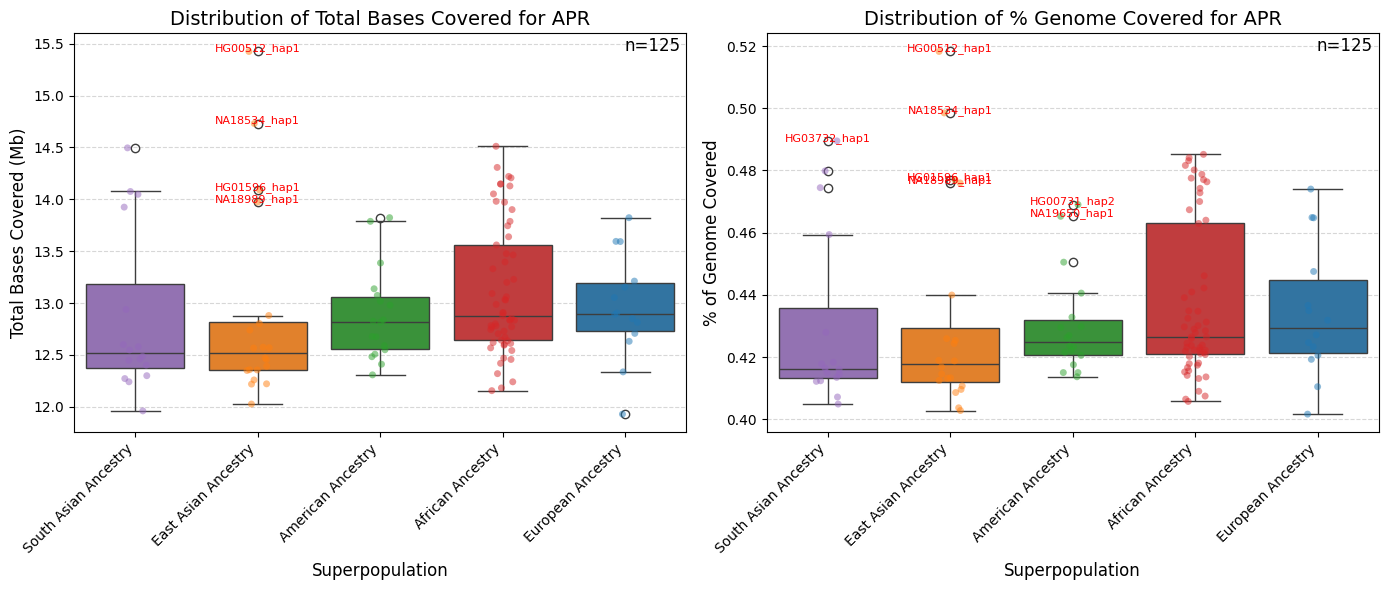

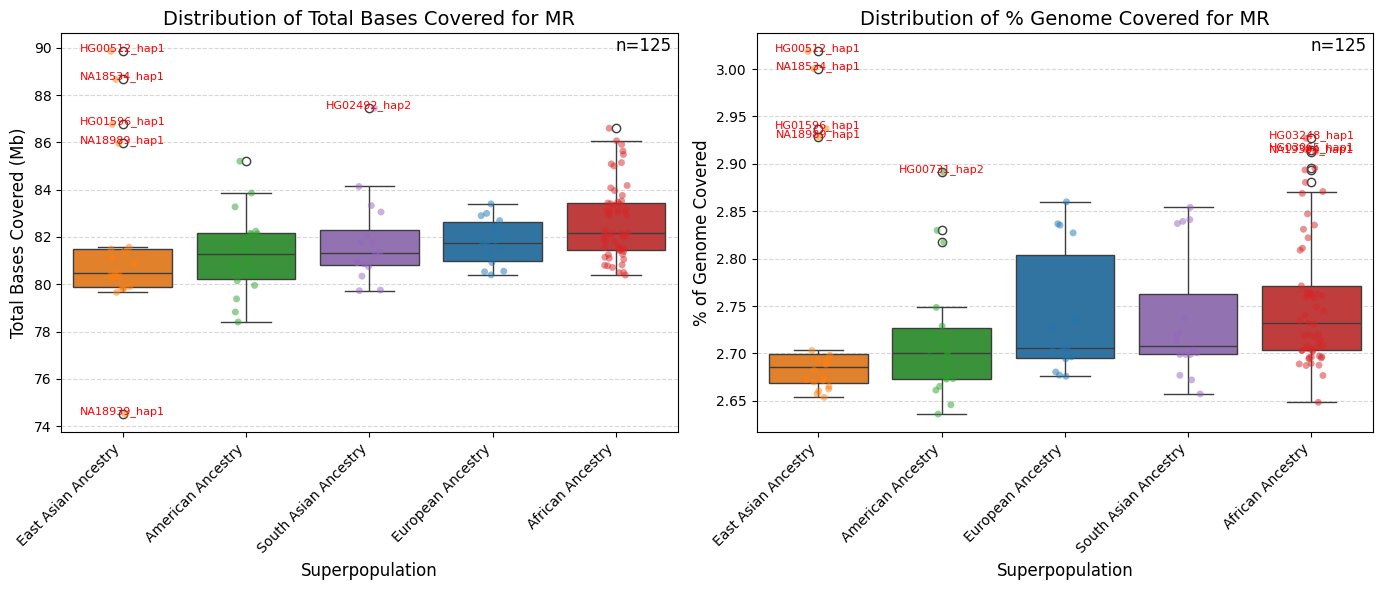

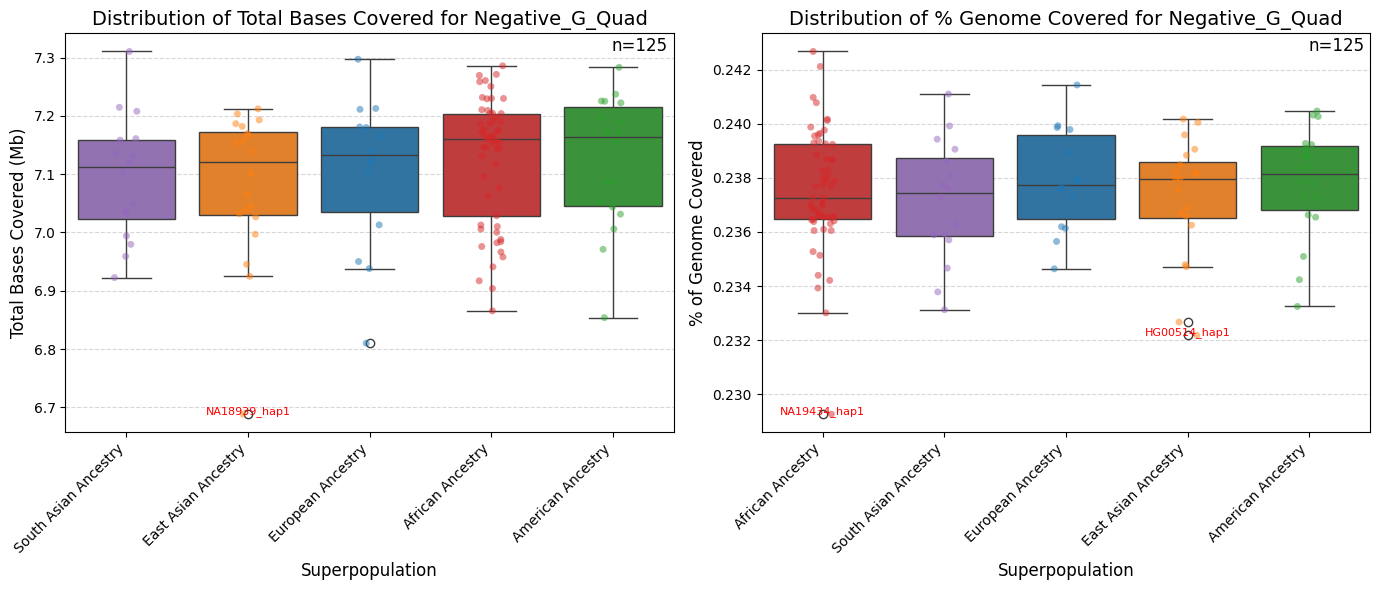

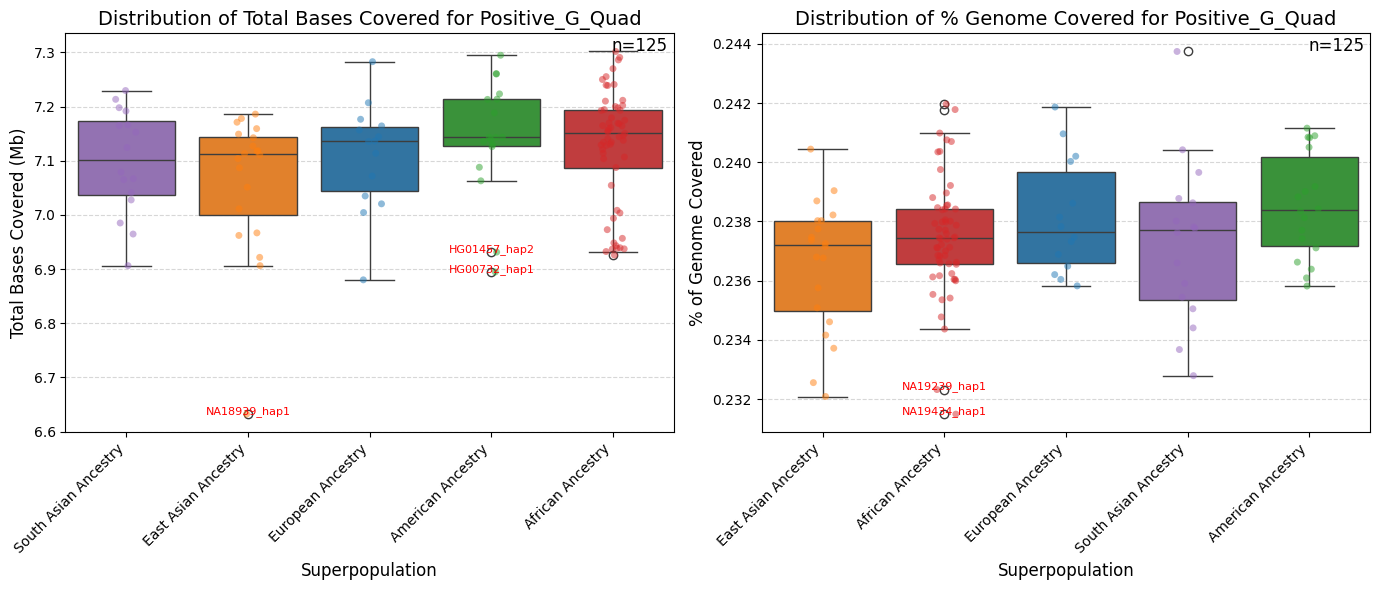

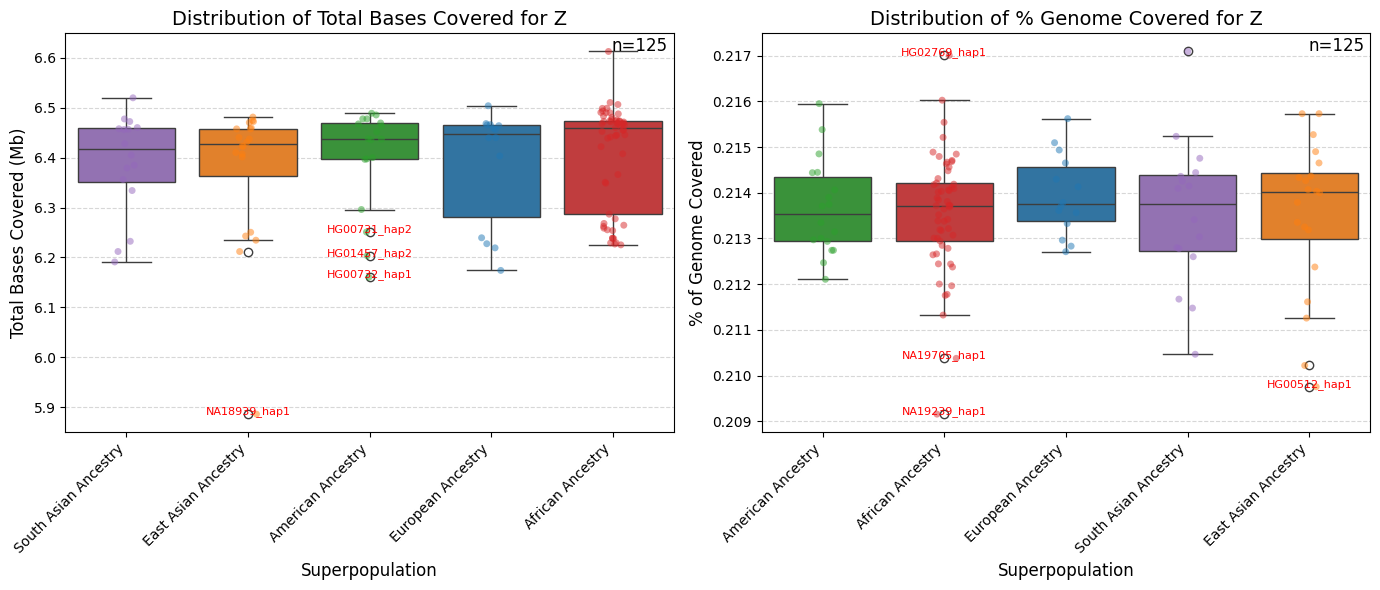

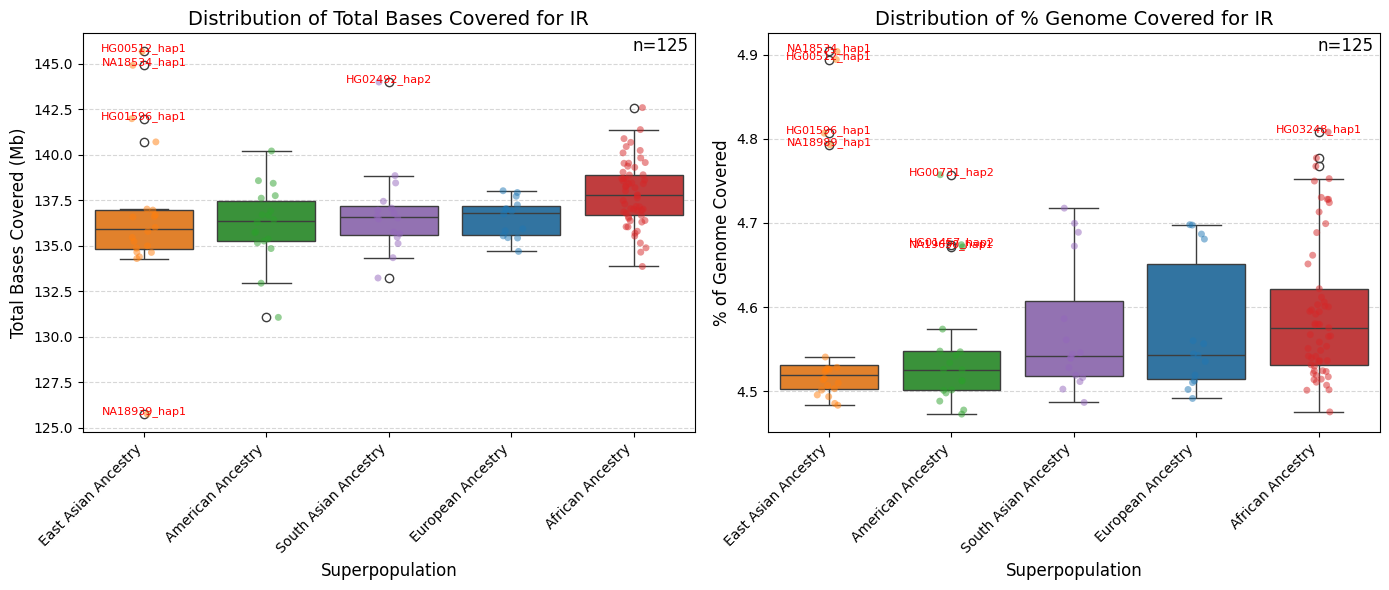

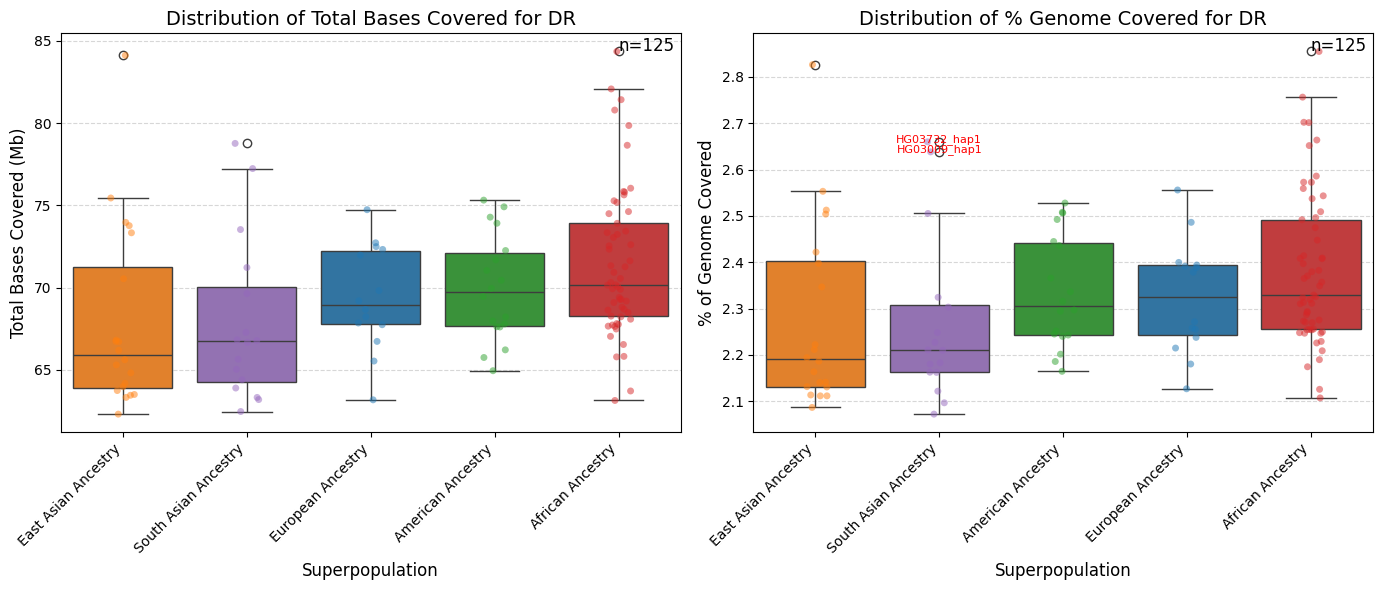

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your feature counts dataframes
batch1 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch3_chm13_collapsed_summary_metrics.csv')
batch4 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Combine the dataframes
df = pd.concat([batch1, batch2, batch3, batch4], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Remove the specified sample_haplotype
df = df[df['Sample_Haplotype'] != 'NA20355_hap1']

# Sort by 'Sample_Haplotype'
sorted_df = df.sort_values(by='Sample_Haplotype')

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the sorted DataFrame on 'Sample' column
merged_df = pd.merge(sorted_df, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Convert 'Total Bases Covered' to Megabases
merged_df['Total Bases Covered (Mb)'] = merged_df['Total Bases Covered'] / 1_000_000

# Function to identify outliers
def identify_outliers(data, multiplier=2):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Define a color palette
superpopulations = merged_df['Superpopulation name'].unique()
palette = sns.color_palette("tab10", len(superpopulations))
color_dict = dict(zip(superpopulations, palette))

# Plotting using seaborn
motif_types = merged_df['Motif Type'].unique()

for motif in motif_types:
    motif_df = merged_df[merged_df['Motif Type'] == motif]
    
    # Calculate medians for sorting
    medians_total_bases = motif_df.groupby('Superpopulation name')['Total Bases Covered (Mb)'].median().sort_values()
    medians_percent_genome = motif_df.groupby('Superpopulation name')['Percent of Genome'].median().sort_values()

    # Sort data by increasing median
    sorted_motif_df_total_bases = motif_df.set_index('Superpopulation name').loc[medians_total_bases.index].reset_index()
    sorted_motif_df_percent_genome = motif_df.set_index('Superpopulation name').loc[medians_percent_genome.index].reset_index()
    
    plt.figure(figsize=(14, 6))  # Adjust the figure size as needed

    # First subplot with distribution of total bases covered in Megabases
    plt.subplot(1, 2, 1)
    # Create a boxplot using seaborn
    sns.boxplot(data=sorted_motif_df_total_bases, x='Superpopulation name', y='Total Bases Covered (Mb)', hue='Superpopulation name', palette=color_dict, dodge=False)
    # Add jittered strip plot
    sns.stripplot(data=sorted_motif_df_total_bases, x='Superpopulation name', y='Total Bases Covered (Mb)', hue='Superpopulation name', palette=color_dict, alpha=0.5, dodge=False, jitter=True, legend=False)
    
    # Identify and annotate outliers
    for pop in sorted_motif_df_total_bases['Superpopulation name'].unique():
        pop_data = sorted_motif_df_total_bases[sorted_motif_df_total_bases['Superpopulation name'] == pop]
        outliers = identify_outliers(pop_data['Total Bases Covered (Mb)'])
        for i in outliers.index:
            sample_haplotype = f"{sorted_motif_df_total_bases.loc[i, 'Sample']}_{sorted_motif_df_total_bases.loc[i, 'Haplotype']}"
            plt.text(x=list(sorted_motif_df_total_bases['Superpopulation name'].unique()).index(pop), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')
    
    # Add total number of unique sample_haplotypes plotted to the top right
    n_haplotypes = sorted_motif_df_total_bases['Sample_Haplotype'].nunique()
    plt.text(x=sorted_motif_df_total_bases['Superpopulation name'].nunique() - 0.55, y=sorted_motif_df_total_bases['Total Bases Covered (Mb)'].max() * 1.0, s=f"n={n_haplotypes}", fontsize=12, ha='right')

    # Customize plot
    plt.xlabel('Superpopulation', fontsize=12)
    plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
    plt.title(f'Distribution of Total Bases Covered for {motif}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend([],[], frameon=False)  # Remove legend from the subplot

    # Second subplot with distribution of percent genome covered
    plt.subplot(1, 2, 2)
    # Create a boxplot using seaborn
    sns.boxplot(data=sorted_motif_df_percent_genome, x='Superpopulation name', y='Percent of Genome', hue='Superpopulation name', palette=color_dict, dodge=False)
    # Add jittered strip plot
    sns.stripplot(data=sorted_motif_df_percent_genome, x='Superpopulation name', y='Percent of Genome', hue='Superpopulation name', palette=color_dict, alpha=0.5, dodge=False, jitter=True, legend=False)
    
    # Identify and annotate outliers
    for pop in sorted_motif_df_percent_genome['Superpopulation name'].unique():
        pop_data = sorted_motif_df_percent_genome[sorted_motif_df_percent_genome['Superpopulation name'] == pop]
        outliers = identify_outliers(pop_data['Percent of Genome'])
        for i in outliers.index:
            sample_haplotype = f"{sorted_motif_df_percent_genome.loc[i, 'Sample']}_{sorted_motif_df_percent_genome.loc[i, 'Haplotype']}"
            plt.text(x=list(sorted_motif_df_percent_genome['Superpopulation name'].unique()).index(pop), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')
    
    # Add total number of unique sample_haplotypes plotted to the top right
    n_haplotypes = sorted_motif_df_percent_genome['Sample_Haplotype'].nunique()
    plt.text(x=sorted_motif_df_percent_genome['Superpopulation name'].nunique() - 0.55, y=sorted_motif_df_percent_genome['Percent of Genome'].max() * 1.0, s=f"n={n_haplotypes}", fontsize=12, ha='right')

    # Customize plot
    plt.xlabel('Superpopulation', fontsize=12)
    plt.ylabel('% of Genome Covered', fontsize=12)
    plt.title(f'Distribution of % Genome Covered for {motif}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend([],[], frameon=False)  # Remove legend from the subplot

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


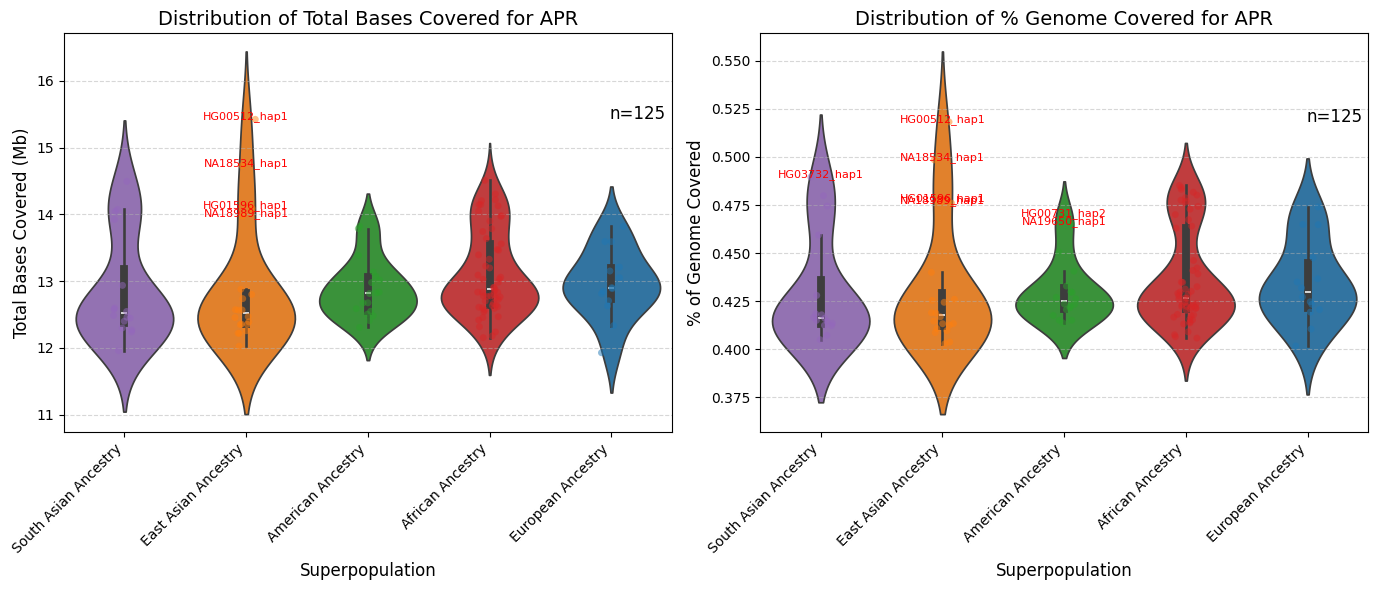

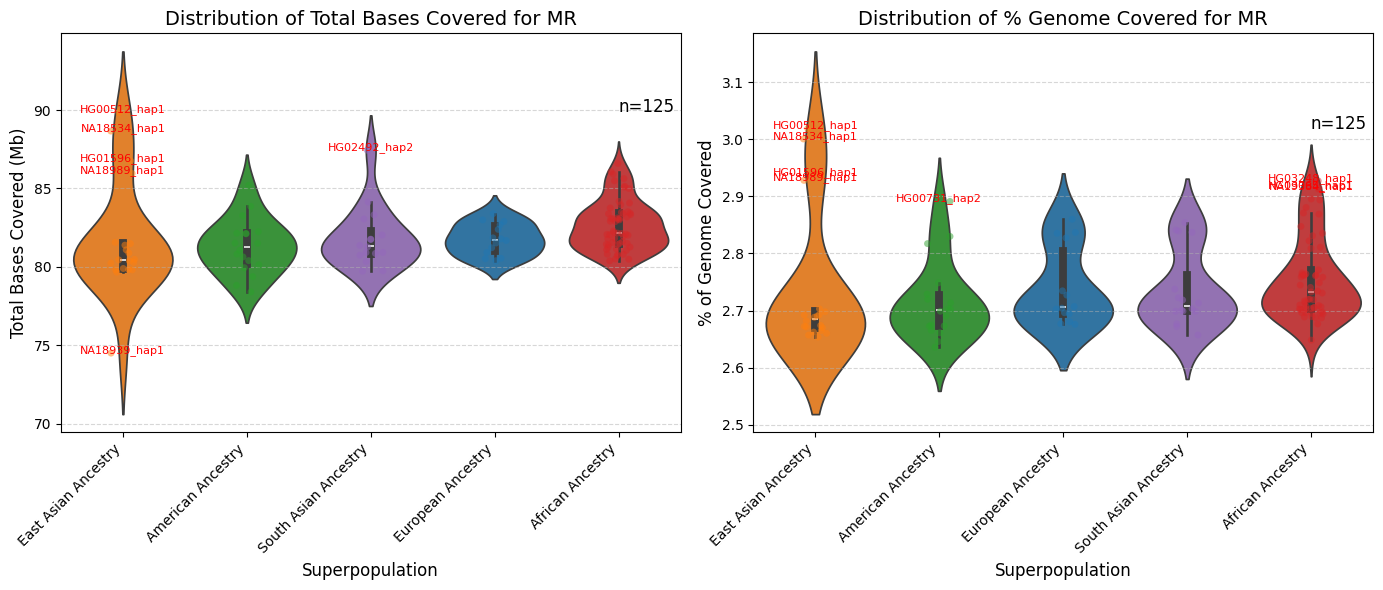

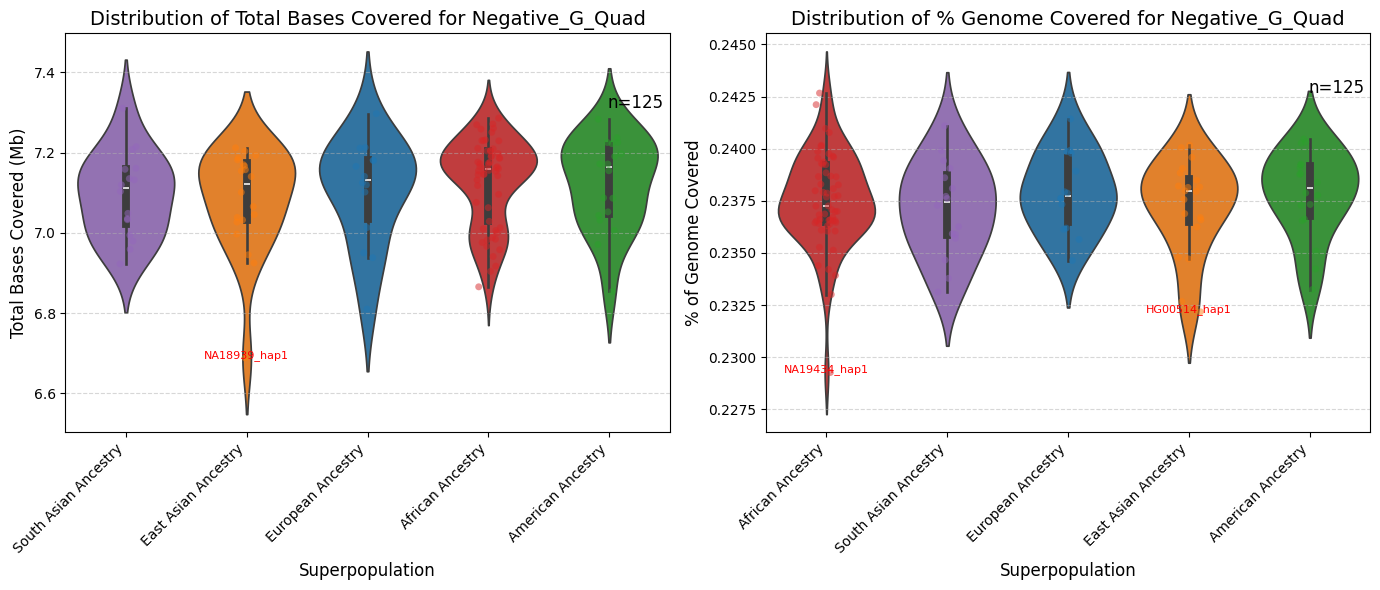

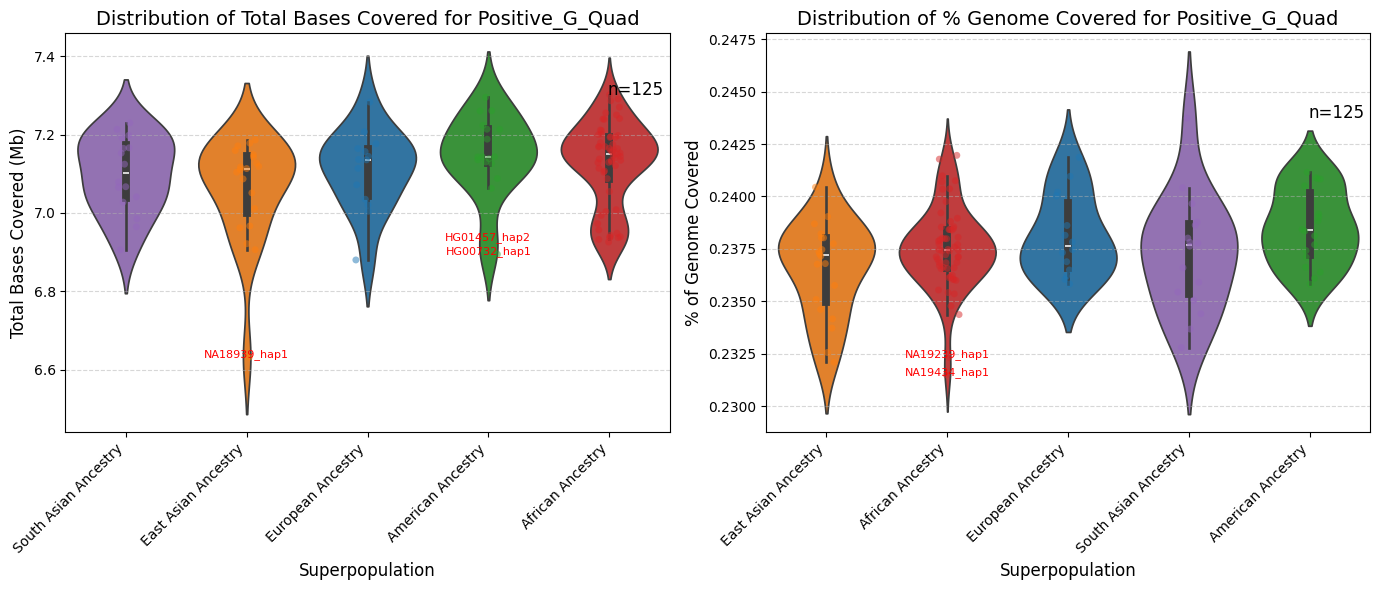

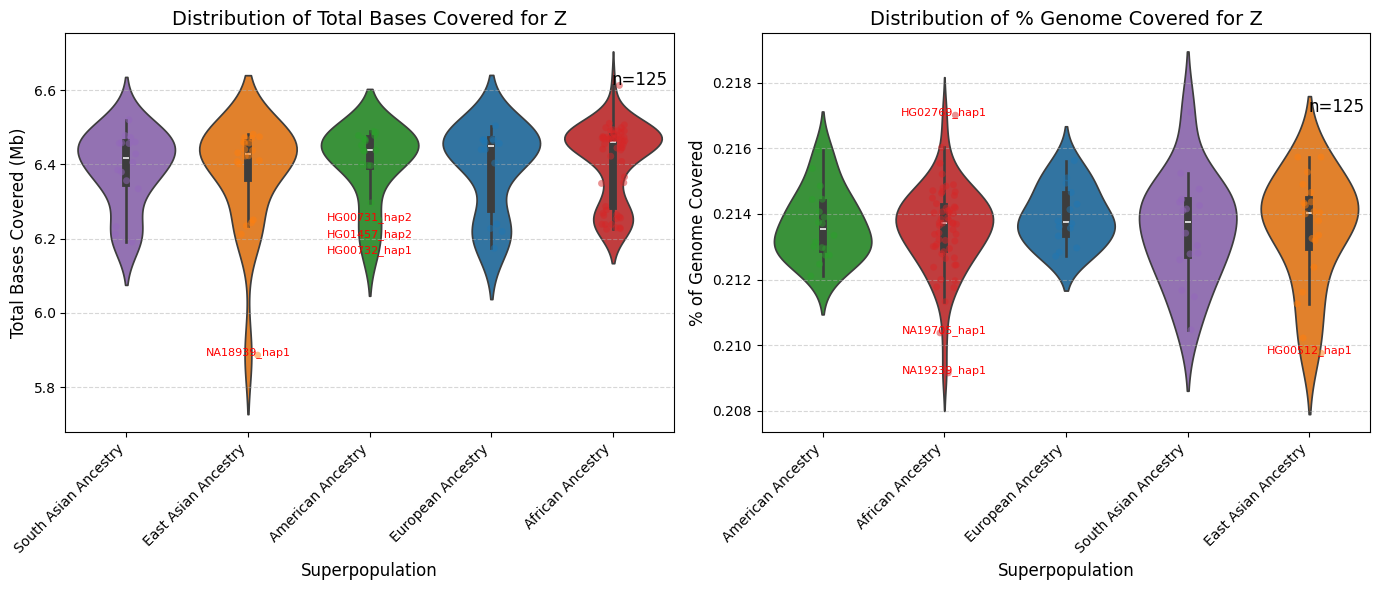

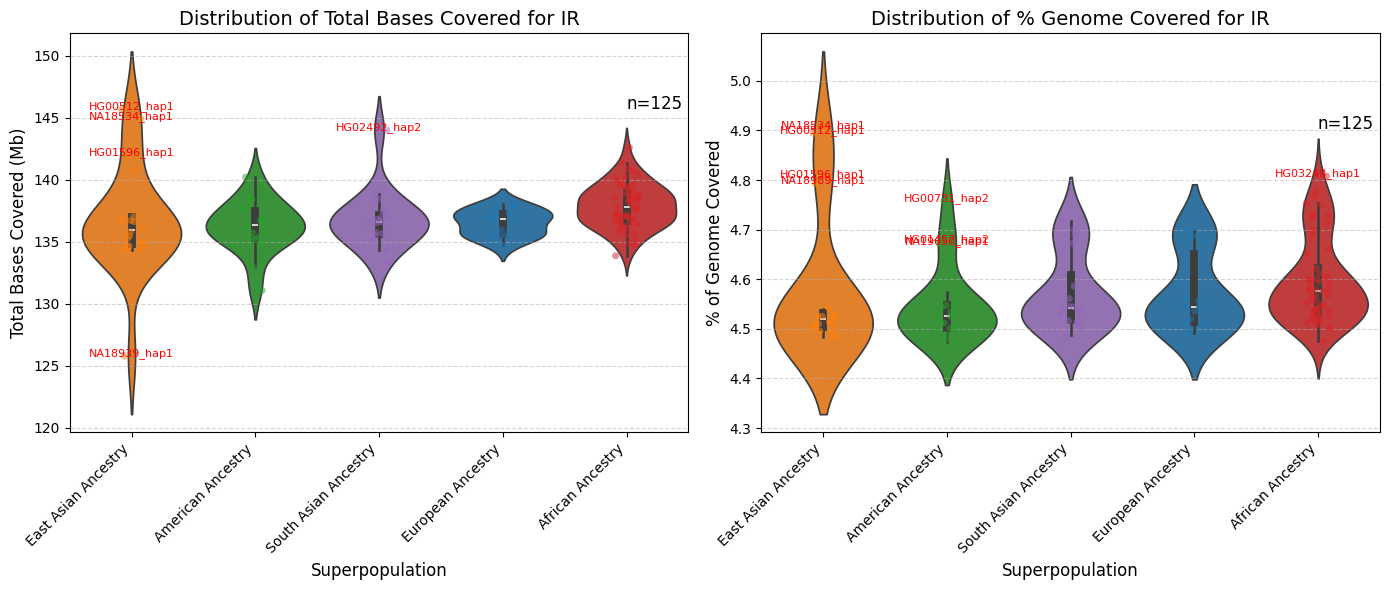

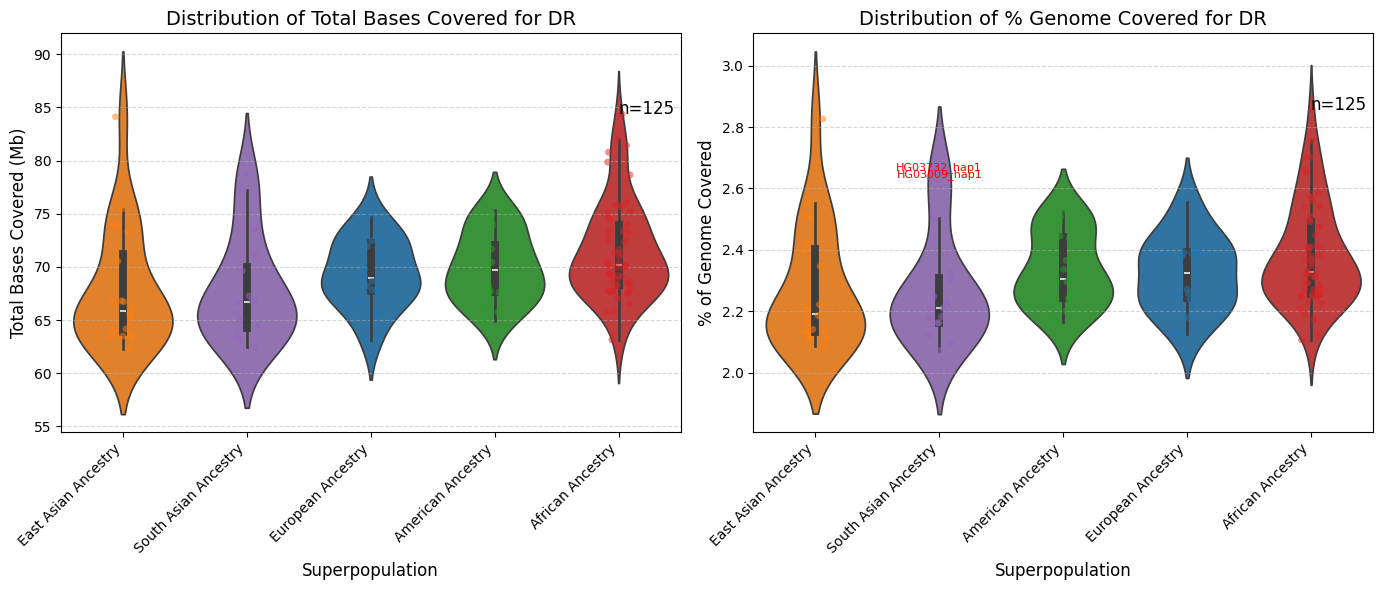

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your feature counts dataframes
batch1 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch3_chm13_collapsed_summary_metrics.csv')
batch4 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Combine the dataframes
df = pd.concat([batch1, batch2, batch3, batch4], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Remove the specified sample_haplotype
df = df[df['Sample_Haplotype'] != 'NA20355_hap1']

# Sort by 'Sample_Haplotype'
sorted_df = df.sort_values(by='Sample_Haplotype')

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the sorted DataFrame on 'Sample' column
merged_df = pd.merge(sorted_df, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Convert 'Total Bases Covered' to Megabases
merged_df['Total Bases Covered (Mb)'] = merged_df['Total Bases Covered'] / 1_000_000

# Function to identify outliers
def identify_outliers(data, multiplier=2):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Define a color palette
superpopulations = merged_df['Superpopulation name'].unique()
palette = sns.color_palette("tab10", len(superpopulations))
color_dict = dict(zip(superpopulations, palette))

# Plotting using seaborn
motif_types = merged_df['Motif Type'].unique()

for motif in motif_types:
    motif_df = merged_df[merged_df['Motif Type'] == motif]
    
    # Calculate medians for sorting
    medians_total_bases = motif_df.groupby('Superpopulation name')['Total Bases Covered (Mb)'].median().sort_values()
    medians_percent_genome = motif_df.groupby('Superpopulation name')['Percent of Genome'].median().sort_values()

    # Sort data by increasing median
    sorted_motif_df_total_bases = motif_df.set_index('Superpopulation name').loc[medians_total_bases.index].reset_index()
    sorted_motif_df_percent_genome = motif_df.set_index('Superpopulation name').loc[medians_percent_genome.index].reset_index()
    
    plt.figure(figsize=(14, 6))  # Adjust the figure size as needed

    # First subplot with distribution of total bases covered in Megabases
    plt.subplot(1, 2, 1)
    # Create a violin plot using seaborn
    sns.violinplot(data=sorted_motif_df_total_bases, x='Superpopulation name', y='Total Bases Covered (Mb)', hue='Superpopulation name', palette=color_dict, dodge=False)
    # Add jittered strip plot
    sns.stripplot(data=sorted_motif_df_total_bases, x='Superpopulation name', y='Total Bases Covered (Mb)', hue='Superpopulation name', palette=color_dict, alpha=0.5, dodge=False, jitter=True, legend=False)
    
    # Identify and annotate outliers
    for pop in sorted_motif_df_total_bases['Superpopulation name'].unique():
        pop_data = sorted_motif_df_total_bases[sorted_motif_df_total_bases['Superpopulation name'] == pop]
        outliers = identify_outliers(pop_data['Total Bases Covered (Mb)'])
        for i in outliers.index:
            sample_haplotype = f"{sorted_motif_df_total_bases.loc[i, 'Sample']}_{sorted_motif_df_total_bases.loc[i, 'Haplotype']}"
            plt.text(x=list(sorted_motif_df_total_bases['Superpopulation name'].unique()).index(pop), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')
    
    # Add total number of unique sample_haplotypes plotted to the top right
    n_haplotypes = sorted_motif_df_total_bases['Sample_Haplotype'].nunique()
    plt.text(x=sorted_motif_df_total_bases['Superpopulation name'].nunique() - 0.55, y=sorted_motif_df_total_bases['Total Bases Covered (Mb)'].max() * 1.0, s=f"n={n_haplotypes}", fontsize=12, ha='right')

    # Customize plot
    plt.xlabel('Superpopulation', fontsize=12)
    plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
    plt.title(f'Distribution of Total Bases Covered for {motif}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend([],[], frameon=False)  # Remove legend from the subplot

    # Second subplot with distribution of percent genome covered
    plt.subplot(1, 2, 2)
    # Create a violin plot using seaborn
    sns.violinplot(data=sorted_motif_df_percent_genome, x='Superpopulation name', y='Percent of Genome', hue='Superpopulation name', palette=color_dict, dodge=False)
    # Add jittered strip plot
    sns.stripplot(data=sorted_motif_df_percent_genome, x='Superpopulation name', y='Percent of Genome', hue='Superpopulation name', palette=color_dict, alpha=0.5, dodge=False, jitter=True, legend=False)
    
    # Identify and annotate outliers
    for pop in sorted_motif_df_percent_genome['Superpopulation name'].unique():
        pop_data = sorted_motif_df_percent_genome[sorted_motif_df_percent_genome['Superpopulation name'] == pop]
        outliers = identify_outliers(pop_data['Percent of Genome'])
        for i in outliers.index:
            sample_haplotype = f"{sorted_motif_df_percent_genome.loc[i, 'Sample']}_{sorted_motif_df_percent_genome.loc[i, 'Haplotype']}"
            plt.text(x=list(sorted_motif_df_percent_genome['Superpopulation name'].unique()).index(pop), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')
    
    # Add total number of unique sample_haplotypes plotted to the top right
    n_haplotypes = sorted_motif_df_percent_genome['Sample_Haplotype'].nunique()
    plt.text(x=sorted_motif_df_percent_genome['Superpopulation name'].nunique() - 0.55, y=sorted_motif_df_percent_genome['Percent of Genome'].max() * 1.0, s=f"n={n_haplotypes}", fontsize=12, ha='right')

    # Customize plot
    plt.xlabel('Superpopulation', fontsize=12)
    plt.ylabel('% of Genome Covered', fontsize=12)
    plt.title(f'Distribution of % Genome Covered for {motif}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend([],[], frameon=False)  # Remove legend from the subplot

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


APR - Total Bases Covered (Mb) p-value: 1.8070e-02


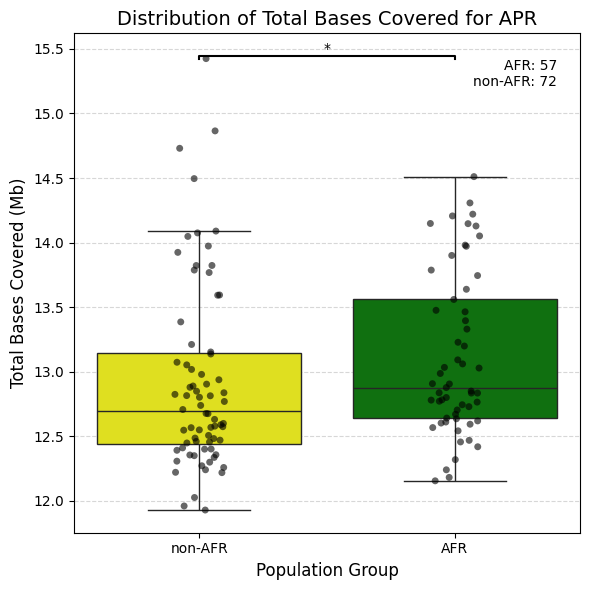

MR - Total Bases Covered (Mb) p-value: 1.4401e-04


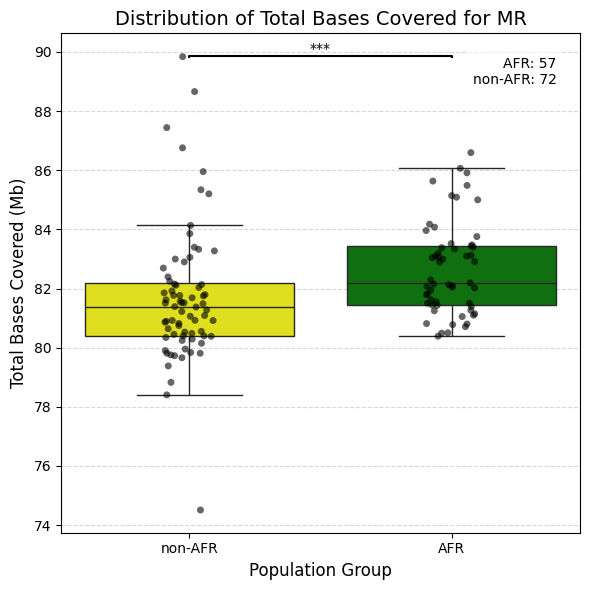

Negative_G_Quad - Total Bases Covered (Mb) p-value: 1.9788e-01


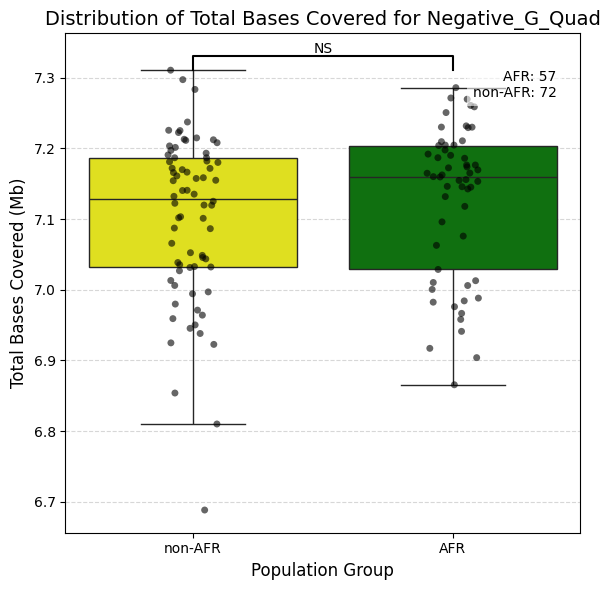

Positive_G_Quad - Total Bases Covered (Mb) p-value: 2.2380e-01


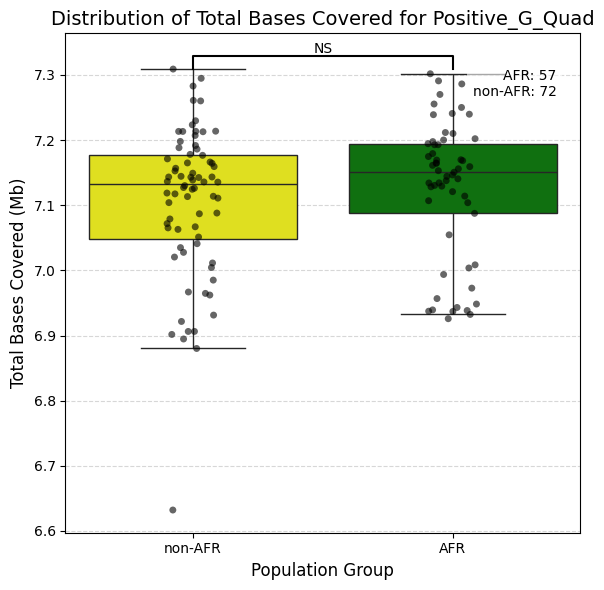

Z - Total Bases Covered (Mb) p-value: 5.3872e-02


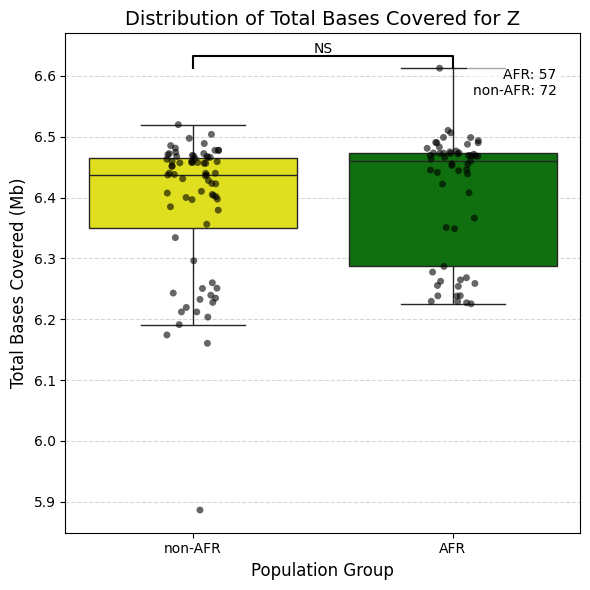

IR - Total Bases Covered (Mb) p-value: 5.4936e-05


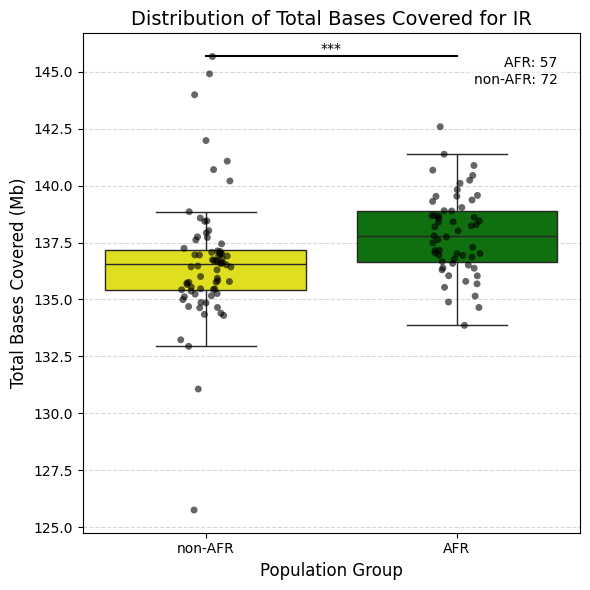

DR - Total Bases Covered (Mb) p-value: 1.0399e-03


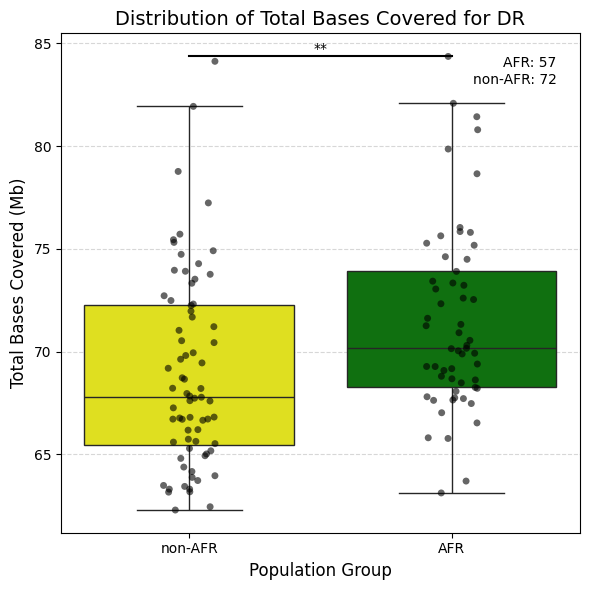

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load your feature counts dataframes
batch1 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch3_chm13_collapsed_summary_metrics.csv')
batch4 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Combine the dataframes
df = pd.concat([batch1, batch2, batch3, batch4], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Remove the specified sample_haplotype
df = df[df['Sample_Haplotype'] != 'NA20355_hap1']

# Sort by 'Sample_Haplotype'
sorted_df = df.sort_values(by='Sample_Haplotype')

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the sorted DataFrame on 'Sample' column
merged_df = pd.merge(sorted_df, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Group non-AFR populations together
merged_df['Population Group'] = merged_df['Superpopulation code'].apply(lambda x: 'AFR' if x == 'AFR' else 'non-AFR')

# Convert 'Total Bases Covered' to Megabases
merged_df['Total Bases Covered (Mb)'] = merged_df['Total Bases Covered'] / 1_000_000

# Define a color palette
palette = {'AFR': 'green', 'non-AFR': 'yellow'}

# Function to add significance annotation
def add_significance_annotation(ax, p_value, x1, x2, y, h, col):
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if p_value < 0.001:
        significance_text = '***'
    elif p_value < 0.01:
        significance_text = '**'
    elif p_value < 0.05:
        significance_text = '*'
    else:
        significance_text = 'NS'
    ax.text((x1 + x2) * .5, y + h, significance_text, ha='center', va='bottom', color=col)

# Plotting using seaborn
motif_types = merged_df['Motif Type'].unique()

for motif in motif_types:
    motif_df = merged_df[merged_df['Motif Type'] == motif]
    
    plt.figure(figsize=(6, 6))  # Adjust the figure size as needed

    # Create a boxplot using seaborn
    ax1 = sns.boxplot(data=motif_df, x='Population Group', y='Total Bases Covered (Mb)', hue='Population Group', palette=palette, dodge=False, showfliers=False)
    # Add jittered stripplot
    sns.stripplot(data=motif_df, x='Population Group', y='Total Bases Covered (Mb)', hue='Population Group', 
                  palette=['black']*2, dodge=False, jitter=True, size=5, marker='o', alpha=0.6, ax=ax1)

    # Customize plot
    plt.xlabel('Population Group', fontsize=12)
    plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
    plt.title(f'Distribution of Total Bases Covered for {motif}', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend([],[], frameon=False)  # Remove legend from the subplot
    
    # Perform Mann-Whitney U test
    afr_data = motif_df[motif_df['Population Group'] == 'AFR']['Total Bases Covered (Mb)']
    non_afr_data = motif_df[motif_df['Population Group'] == 'non-AFR']['Total Bases Covered (Mb)']
    _, p_value_total_bases = mannwhitneyu(afr_data, non_afr_data)
    
    # Print p-value
    print(f'{motif} - Total Bases Covered (Mb) p-value: {p_value_total_bases:.4e}')
    
    # Add significance annotation
    add_significance_annotation(ax1, p_value_total_bases, 0, 1, motif_df['Total Bases Covered (Mb)'].max(), 0.02, 'black')

    # Calculate unique sample_haplotype counts for AFR and non-AFR
    afr_sample_haplotypes = motif_df[motif_df['Population Group'] == 'AFR']['Sample_Haplotype'].nunique()
    non_afr_sample_haplotypes = motif_df[motif_df['Population Group'] == 'non-AFR']['Sample_Haplotype'].nunique()
    
    # Add annotations for sample_haplotype counts
    ax1.text(1.4, motif_df['Total Bases Covered (Mb)'].max(), f"AFR: {afr_sample_haplotypes}\nnon-AFR: {non_afr_sample_haplotypes}", 
             ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


In [1]:
### FIND GROUPED INTERSECTIONS BETWEEN HAPLOTYPES
import pandas as pd

def process_intersections(bed_file):
    # Read the BED file into a DataFrame
    df = pd.read_csv(bed_file, sep='\t', header=None, names=['chrom', 'start', 'end', 'filename', 'chrom2', 'start2', 'end2'])
    
    # Drop duplicate filenames for the same region
    df_unique = df.drop_duplicates(subset=['chrom', 'start', 'end', 'filename'])
    
    # Group by the chrom, start, and end columns and count unique filenames
    grouped = df_unique.groupby(['chrom', 'start', 'end'])['filename'].nunique().reset_index(name='unique_haplotype_count')
    
    # Sort the grouped DataFrame by unique_haplotype_count in descending order
    sorted_grouped = grouped.sort_values(by='unique_haplotype_count', ascending=False)
    
    return sorted_grouped

# Main script
bed_file_path = '/home/alextu/scratch/verkko_batch123_chm13_IR_intersected_output.bed'  # Replace with your actual file path
grouped_intersections = process_intersections(bed_file_path)

# Save the grouped DataFrame to a new BED file
output_bed_file_path = '/home/alextu/scratch/verkko_batch123_chm13_IR_grouped_intersections_chm13_negstrand.bed'  # Replace with your desired output path
grouped_intersections.to_csv(output_bed_file_path, sep='\t', header=False, index=False, columns=['chrom', 'start', 'end', 'unique_haplotype_count'])

# Print the first few rows of the grouped DataFrame
print(grouped_intersections.head())


         chrom     start       end  unique_haplotype_count
5623866   chr9  35514045  35515452                     128
132131    chr1  69792990  69794252                     128
603103   chr10  58325412  58327566                     128
5612351   chr9  29882763  29884416                     127
2583410   chr2  16175621  16177482                     127


In [7]:
### Are common regions shared by ancestries?

import pandas as pd

def extract_sample_name(filename):
    # Extract the first part of the filename before the first underscore
    return filename.split('_')[0]

def process_intersections(bed_file, metadata_file):
    # Read the BED file into a DataFrame
    df = pd.read_csv(bed_file, sep='\t', header=None, names=['chrom', 'start', 'end', 'score', 'filename', 'chrom2', 'start2', 'end2', 'score2'])
    
    # Drop duplicate filenames for the same region
    df_unique = df.drop_duplicates(subset=['chrom', 'start', 'end', 'filename']).copy()
    
    # Extract sample name from filename
    df_unique.loc[:, 'Sample'] = df_unique['filename'].apply(extract_sample_name)
    
    # Read the metadata file into a DataFrame
    metadata_df = pd.read_csv(metadata_file, delimiter='\t')
    
    # Merge metadata with the DataFrame
    df_merged = pd.merge(df_unique, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']],
                         left_on='Sample', right_on='Sample name', how='left')
    
    # Group by the chrom, start, and end columns and aggregate unique filenames and metadata
    grouped = df_merged.groupby(['chrom', 'start', 'end']).agg(
        unique_haplotype_count=('filename', 'nunique'),
        haplotypes=('filename', lambda x: list(x)),
        superpopulations=('Superpopulation name', lambda x: list(x)),
        superpopulation_codes=('Superpopulation code', lambda x: list(x))
    ).reset_index()
    
    # Filter regions with more than 5 overlaps
    filtered_grouped = grouped[grouped['unique_haplotype_count'] > 5]
    
    # Sort the filtered grouped DataFrame by unique_haplotype_count in descending order
    sorted_filtered_grouped = filtered_grouped.sort_values(by='unique_haplotype_count', ascending=False)
    
    return sorted_filtered_grouped

# Main script
bed_file_path = '/home/alextu/scratch/quadron_haplotype_intersections_chm13_query/verkko_batch123_chm13_quadron_posstrand_intersected_output.bed'  # Replace with your actual file path
metadata_file_path = '/home/alextu/scratch/igsr_samples.tsv'  # Replace with your metadata file path
grouped_intersections = process_intersections(bed_file_path, metadata_file_path)

# Filter for clusters where all haplotypes are from the same superpopulation
same_superpopulation_clusters = grouped_intersections[
    grouped_intersections['superpopulations'].apply(lambda x: len(set(x)) == 1)
]

# Save the clusters with the same superpopulation to a new CSV file
same_superpopulation_clusters_output_file_path = '/home/alextu/scratch/quadron_verkko_batch123_same_superpopulation_clusters_chm13_posstrand.csv'  # Replace with your desired output path
same_superpopulation_clusters.to_csv(same_superpopulation_clusters_output_file_path, index=False)

# Print the first few rows of the same superpopulation clusters
print(same_superpopulation_clusters.head())


       chrom      start        end  unique_haplotype_count  \
93      chr1     469936     470018                       9   
12586  chr10  133892549  133892585                       6   
85986   chr8    1272322    1272363                       6   
114     chr1     486907     486944                       6   
86099   chr8    2186250    2186281                       6   

                                              haplotypes  \
93     [HG02587_hap2_quadron_filtered_verkko_batch1_p...   
12586  [HG02818_hap1_quadron_filtered_verkko_batch1_p...   
85986  [HG02011_hap1_quadron_filtered_verkko_batch2_p...   
114    [HG02953_hap1_quadron_filtered_verkko_batch1_p...   
86099  [HG02666_hap2_quadron_filtered_verkko_batch1_p...   

                                        superpopulations  \
93     [African Ancestry, African Ancestry, African A...   
12586  [African Ancestry, African Ancestry, African A...   
85986  [African Ancestry, African Ancestry, African A...   
114    [African Ancestry, 

        chrom     start       end  length category
6177611  chrY      6935      6946      11    Short
6177612  chrY      6966      6977      11    Short
6177613  chrY      7316      7374      58   Medium
6177614  chrY      8853      8877      24    Short
6177615  chrY      9785      9801      16    Short
...       ...       ...       ...     ...      ...
6318729  chrY  62451423  62451434      11    Short
6318730  chrY  62451491  62451503      12    Short
6318731  chrY  62451750  62451763      13    Short
6318732  chrY  62452695  62452738      43   Medium
6318733  chrY  62452848  62453126     278   Medium

[141123 rows x 5 columns]
Number of chrY rows: 141123
Total bases covered on chrY (Mb): 9.396113


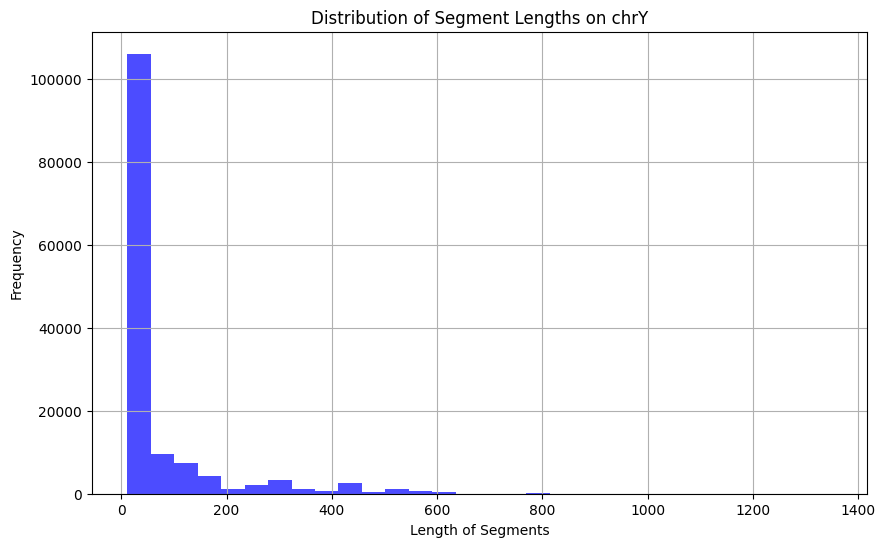

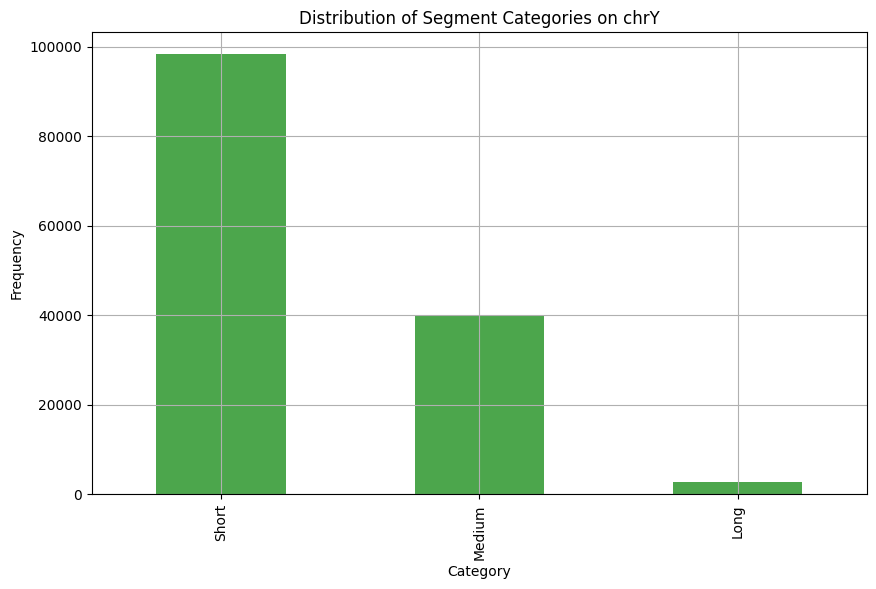

category
Short     98325
Medium    40148
Long       2650
Name: count, dtype: int64


In [1]:
### Y CHROMOSOME INVERTED REPEAT ANALYSIS

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a BED file
bed_file_path = '~/scratch/results/bed_files/chm13_ref_genome/chm13v2.0_nonb_annotations_collapsed/IR/IR.collapsed.bed'
df = pd.read_csv(bed_file_path, sep='\t', header=None, names=['chrom', 'start', 'end'])

# Filter to keep only chrY
df_chrY = df[df['chrom'] == 'chrY'].copy()

# Calculate the length of each interval
df_chrY['length'] = df_chrY['end'] - df_chrY['start']

# Define categories based on length
def categorize_length(length):
    if length <= 30:
        return 'Short'
    elif length <= 499:
        return 'Medium'
    else:
        return 'Long'

# Apply the categorization function
df_chrY['category'] = df_chrY['length'].apply(categorize_length)

# Calculate the total bases covered
total_bases_covered = df_chrY['length'].sum()

# Count the number of chrY rows
chrY_count = len(df_chrY)

# Display the DataFrame, the count of chrY rows, and the total bases covered
print(df_chrY)
print(f'Number of chrY rows: {chrY_count}')
print(f'Total bases covered on chrY (Mb): {total_bases_covered/1000000}')

# Plotting the distribution of lengths
plt.figure(figsize=(10, 6))
plt.hist(df_chrY['length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Segment Lengths on chrY')
plt.xlabel('Length of Segments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the count of each category
plt.figure(figsize=(10, 6))
df_chrY['category'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Distribution of Segment Categories on chrY')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(df_chrY['category'].value_counts())

Original DataFrame shape: (351192, 15)
Max Spacer: 100
Min Spacer: 0
Max Repeat: 111
Min Repeat: 6


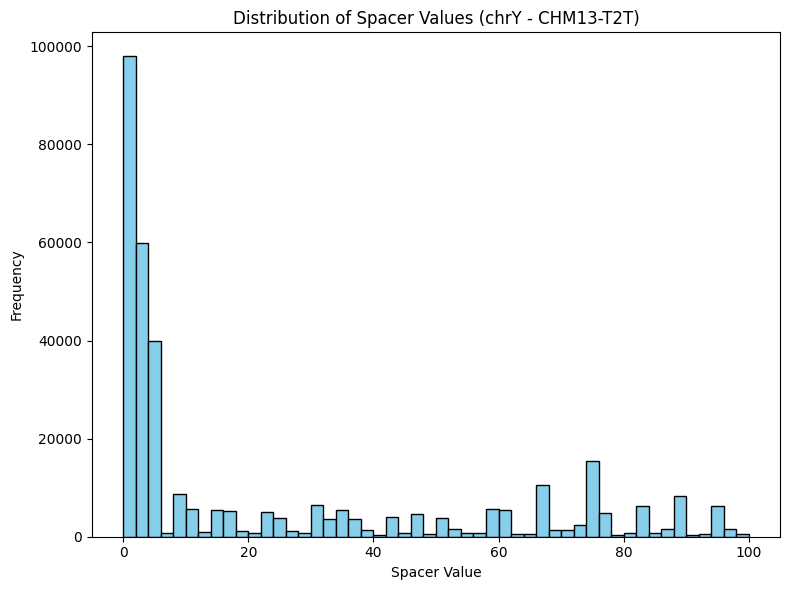

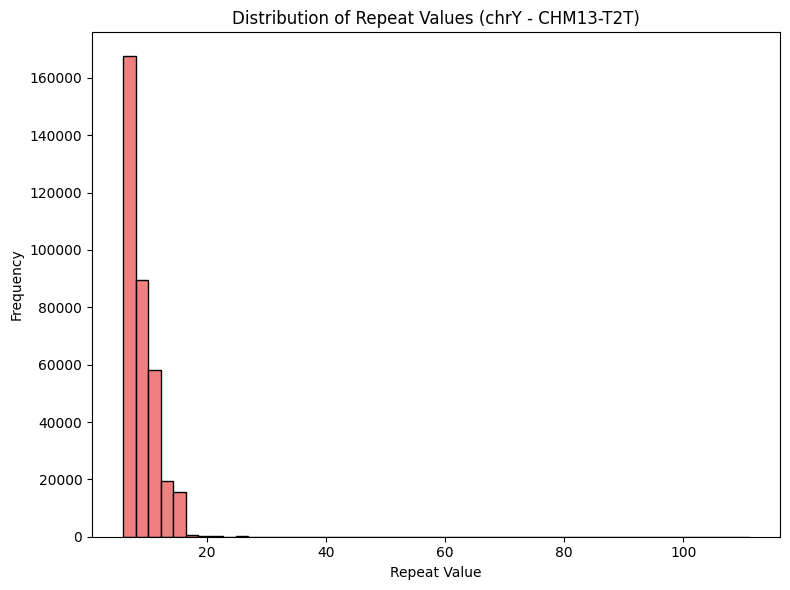

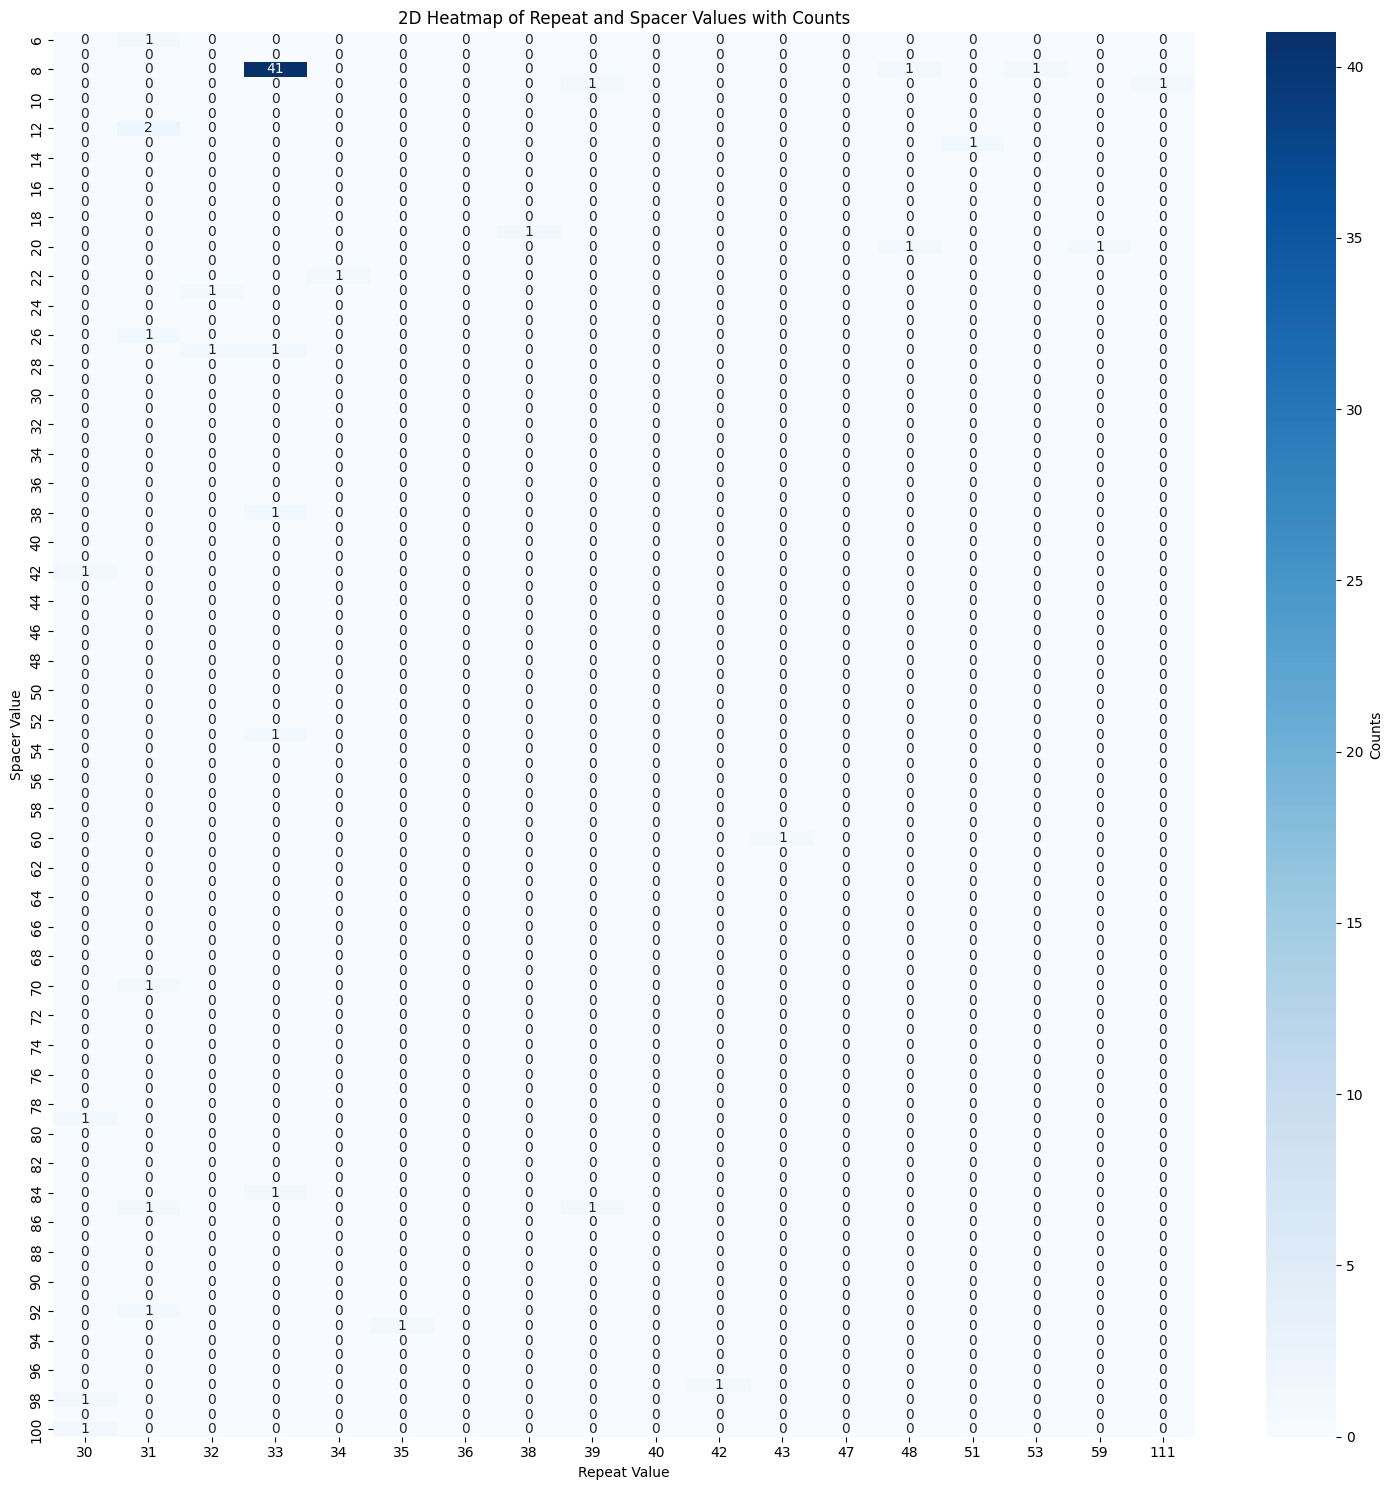

     Repeat  Spacer  Counts
1         6       1   28298
4         6       4   22488
3         6       3   20727
2         6       2   17071
0         6       0   16993
6         7       1   16622
94       10      74   13882
8         7       3   11942
11        8       1   11607
15        9       0    9351
9         7       4    7874
14        8       4    5176
131      11      10    5105
80       10      60    4987
42       10      22    4833
78       10      58    4825
338      13      15    4740
50       10      30    4732
187      11      66    4675
389      13      66    4622
222      12       0    4582
540      15      16    4481
109      10      89    4471
21       10       1    4345
230      12       8    4304
605      15      82    4101
599      15      76    4012
257      12      35    3969
66       10      46    3945
316      12      94    3924
17        9       2    3874
163      11      42    3743
19        9       4    3726
433      14       9    3514
108      10      88 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe
df = pd.read_csv('~/scratch/nonb_motif_annotations_hgsvc/chm13/chm13_nonb_gfa_annotations_tsvs/chm13v2.0_IR_chrY.tsv', sep="\t")

# Filter the dataframe to only include rows where Repeat value is less than or equal to 6
#filtered_df = df[(df['Repeat'] <= 6)]


# Further filter to include Spacer lengths of 4-5 and Repeat lengths between 6-25
#filtered_df = df[(df['Spacer'].between(6, 100)) & (df['Repeat'].between(30, 111))]
#print(f"Filtered DataFrame shape: {filtered_df.shape}")

# Extract necessary columns for BED file
#bed_file = filtered_df[['Sequence_name', 'Start', 'Stop']]

# Save the filtered dataframe to a CSV file without header and index
#bed_file.to_csv('~/scratch/nonb_motif_annotations_hgsvc/chm13/chm13_nonb_gfa_annotations_tsvs/chm13v2.0_IR_chrY_sp6_100_re_30_111_filtered.bed', sep="\t", header=False, index=False)

# Print the shape of the original dataframe
print(f"Original DataFrame shape: {df.shape}")

# Ensure Spacer and Repeat columns are numeric
df.loc[:, 'Spacer'] = pd.to_numeric(df['Spacer'], errors='coerce')
df.loc[:, 'Repeat'] = pd.to_numeric(df['Repeat'], errors='coerce')

# Print the max and min values of Spacer and Repeat columns
max_spacer = df['Spacer'].max()
min_spacer = df['Spacer'].min()
max_repeat = df['Repeat'].max()
min_repeat = df['Repeat'].min()

print(f"Max Spacer: {max_spacer}")
print(f"Min Spacer: {min_spacer}")
print(f"Max Repeat: {max_repeat}")
print(f"Min Repeat: {min_repeat}")

# Plotting the distribution for Spacer values
plt.figure(figsize=(8, 6))
df['Spacer'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Spacer Values (chrY - CHM13-T2T)')
plt.xlabel('Spacer Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plotting the distribution for Repeat values
plt.figure(figsize=(8, 6))
df['Repeat'].plot(kind='hist', bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Repeat Values (chrY - CHM13-T2T)')
plt.xlabel('Repeat Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Creating a pivot table for the 2D heatmap
heatmap_data = df.pivot_table(index='Spacer', columns='Repeat', aggfunc='size', fill_value=0)

# Filter heatmap data to include only repeats of length 6 to 25
heatmap_data_filtered = heatmap_data.loc[6:100, 30:111]

# Plotting the 2D Heatmap with counts
plt.figure(figsize=(15, 15))
sns.heatmap(heatmap_data_filtered, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Counts'})
plt.title('2D Heatmap of Repeat and Spacer Values with Counts')
plt.xlabel('Repeat Value')
plt.ylabel('Spacer Value')
plt.tight_layout()
plt.show()

# Finding the most common Repeat and Spacer combinations
common_combinations = df.groupby(['Repeat', 'Spacer']).size().reset_index(name='Counts')
common_combinations_sorted = common_combinations.sort_values(by='Counts', ascending=False)

# Filter and display the common combinations with counts greater than 1000
common_combinations_gt1 = common_combinations_sorted[common_combinations_sorted['Counts'] > 1000]
print(common_combinations_gt1)


In [3]:
import pysam
import csv
import os

# Define the input BAM file and output CSV file
bam_file = '/home/alextu/scratch/filtered_chr_bams/chm13/20240201_verkko_batch3_align_chm13/HG00096/HG00096_hap1_primary.bam'
output_csv = "/home/alextu/scratch/sv_flanks.csv"

# Check if the BAM file exists
if not os.path.exists(bam_file):
    raise FileNotFoundError(f"BAM file not found: {bam_file}")

# Open the BAM file using pysam
try:
    bam = pysam.AlignmentFile(bam_file, "rb")
except Exception as e:
    raise RuntimeError(f"Failed to open BAM file: {e}")

# Define the region
region = {"chr": "chrX", "pre_start": 21195, "pre_end": 23195, "post_start": 23500, "post_end": 25500
         "chr": "chrX", "pre_start": 21195, "pre_end": 23195, "post_start": 23500, "post_end": 25500}

# Function to fetch sequence using pileup
def get_sequence(bam, chrom, start, end):
    sequence = []
    for pileupcolumn in bam.pileup(chrom, start, end, truncate=True):
        for pileupread in pileupcolumn.pileups:
            if pileupread.is_del or pileupread.is_refskip:
                continue
            sequence.append(pileupread.alignment.query_sequence[pileupread.query_position])
    return ''.join(sequence)

# Fetch pre-flanking sequence
pre_flank_seq = get_sequence(bam, region["chr"], region["pre_start"], region["pre_end"])

# Fetch post-flanking sequence
post_flank_seq = get_sequence(bam, region["chr"], region["post_start"], region["post_end"])

# Prepare the CSV file
with open(output_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Write the header
    csvwriter.writerow(['ID', 'pre_flank_seq', 'post_flank_seq'])
    # Write the sequences to the CSV file
    csvwriter.writerow([region["chr"], pre_flank_seq, post_flank_seq])

print(f"Output written to {output_csv}")
print(f"Pre-flank sequence length: {len(pre_flank_seq)}")
print(f"Pre-flank sequence: {pre_flank_seq}")
print(f"Post-flank sequence length: {len(post_flank_seq)}")
print(f"Post-flank sequence: {post_flank_seq}")

Output written to /home/alextu/scratch/sv_flanks.csv
Pre-flank sequence length: 2000
Pre-flank sequence: CATTGAGGACACATAGAGAGCAGACTGTGCAACCTTTAGAGTCTGCATTGGGCCTATGTCTCATTGAGGACAGTTAGAGAGCAGACTGTGCAACCTTTAGAGTCTGCATTTGGCCTAGGTCTCATTGAGGACAGAAACAGACCAGAGTGTGCAACCTTTAGAGTCAGCATTGGGCCTAGGTCTCATTGAGGACAGATAGAGAGCAGACTGTAGAAACTTTATAGTCTGCATTGGGCCTAGGTCTCATTGAGGTCAGATAGAGAGCAGACTGTGCAAGCTTTAGAGTCTGCACTTGGCCTAGGTCTCATTGAGGACAGATAGAGAGCAGACTGTGCAAACTCTAGAGTCTGCATTGGGCCTAGGTCTCATTGAGGGCAGATAGAGACCAGACTATGCAACGTTTAGAGTCTGCATTGGGCCTAGGTCTCATTGAGGGCAGTTAGAGAGCAGACTGTGCAACATTTAGAGTCTGCATTGGGCCTAGGTCTCATTGAGAGCAGATAGAGAGCACACTGTGCAAACTTTAGAGTCGGCATTGGGCCTAGGTCTCATTGAGGACAGATAGAGACCGGACTGTGCAACCTTTAGAGTCTGCATTGGGCCTACGTCTCATTGAGGACAGATAGAGAGCAGACTAGGCAACCATTAGAGTCGGCACTGGTCCTAGGTCTCATTGAGGACAGATATAGAGCAGACTGTGCAACCTTTAGAGTCTGCATTGGGCCTGGGTCTCATTGAGGACAGATAGCGACCAGACTGTGCAACCTTTAGAGTCTGCATTGGGCTTAGGTCTCATTGAGGGCAGTTAGAGAGCAGACTGTGCAACCTTTAGAGTCTGCATTGGGCCTAGGTCTCATTGAGAGCAGATAGAGAGCACACTGTGCAACCTCTAGAG